# Steps
---
1. Data feature gathering
2. Understading data Dristribution
3. Oversampeling data target
4. standarize the data
5. Train model to predict normal or abnormal
6. K-mean clusterin to classifiy the model find types of abnormal
7. Pickel files 


---
# Machine Learning
---

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [48]:
dataset_org = pd.read_csv('./dataset/processed_data/valve_all.csv.xz')
dataset_org.head()

,Unnamed: 0,dataset,machine,SNR,machine_id,wavefile,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,...,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,0,0_dB_valve.zip,valve,0,0,valve/id_00/abnormal/00000000.wav,0,0.004665,0.000634,0.095045,...,0.558010,0.567770,0.038046,0.032953,1723.556396,185.084769,14.589211,3.031553,3339.406949,619.316220
1,1,0_dB_valve.zip,valve,0,0,valve/id_00/abnormal/00000001.wav,0,0.004692,0.000471,0.067036,...,0.653668,0.406258,0.022090,0.024783,1792.520897,240.548666,15.097797,3.081173,3136.281949,878.154800
2,2,0_dB_valve.zip,valve,0,0,valve/id_00/abnormal/00000002.wav,0,0.004550,0.000603,0.096482,...,0.378792,0.482797,0.023362,0.025181,1888.315140,193.849624,17.165913,4.413750,3373.502396,807.163642
3,3,0_dB_valve.zip,valve,0,0,valve/id_00/abnormal/00000003.wav,0,0.004744,0.000394,0.072244,...,0.568019,0.569796,0.014277,0.024537,1365.357971,286.240942,15.132473,3.347690,2290.210663,846.370117
4,4,0_dB_valve.zip,valve,0,0,valve/id_00/abnormal/00000004.wav,0,0.004438,0.001402,0.071167,...,0.461645,0.597445,0.015854,0.031062,1407.998121,297.512811,15.296884,3.182195,2384.060503,926.322605


In [49]:
dataset_org.columns[5:]

Index(['wavefile', 'is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
       'T_zcr_std', 'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean',
       'F_mel_rms_std', 'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
       'F_flatness_std', 'F_bandwidth_mean', 'F_bandwidth_std',
       'F_contrast_mean', 'F_contrast_std', 'F_rolloff_mean', 'F_rolloff_std'],
      dtype='object')

In [50]:
dataset = dataset_org.iloc[:,5:].copy()
dataset.head()

,wavefile,is_normal,T_rms_mean,T_rms_std,T_zcr_mean,T_zcr_std,F_mel_mean,F_mel_std,F_mel_rms_mean,F_mel_rms_std,F_mfcc_mean,F_mfcc_std,F_flatness_mean,F_flatness_std,F_bandwidth_mean,F_bandwidth_std,F_contrast_mean,F_contrast_std,F_rolloff_mean,F_rolloff_std
0,valve/id_00/abnormal/00000000.wav,0,0.004665,0.000634,0.095045,0.095045,0.015096,0.019175,0.002852,0.000432,0.558010,0.567770,0.038046,0.032953,1723.556396,185.084769,14.589211,3.031553,3339.406949,619.316220
1,valve/id_00/abnormal/00000001.wav,0,0.004692,0.000471,0.067036,0.067036,0.012524,0.020967,0.002865,0.000359,0.653668,0.406258,0.022090,0.024783,1792.520897,240.548666,15.097797,3.081173,3136.281949,878.154800
2,valve/id_00/abnormal/00000002.wav,0,0.004550,0.000603,0.096482,0.096482,0.012045,0.019781,0.002776,0.000443,0.378792,0.482797,0.023362,0.025181,1888.315140,193.849624,17.165913,4.413750,3373.502396,807.163642
3,valve/id_00/abnormal/00000003.wav,0,0.004744,0.000394,0.072244,0.072244,0.014887,0.020036,0.002901,0.000290,0.568019,0.569796,0.014277,0.024537,1365.357971,286.240942,15.132473,3.347690,2290.210663,846.370117
4,valve/id_00/abnormal/00000004.wav,0,0.004438,0.001402,0.071167,0.071167,0.013431,0.020103,0.002712,0.000878,0.461645,0.597445,0.015854,0.031062,1407.998121,297.512811,15.296884,3.182195,2384.060503,926.322605


## Analysis missing data

,Column Name,Missing Count,Missing data %
0,wavefile,0,0.0
1,is_normal,0,0.0
2,F_rolloff_mean,0,0.0
3,F_contrast_std,0,0.0
4,F_contrast_mean,0,0.0
5,F_bandwidth_std,0,0.0
6,F_bandwidth_mean,0,0.0
7,F_flatness_std,0,0.0
8,F_flatness_mean,0,0.0
9,F_mfcc_std,0,0.0


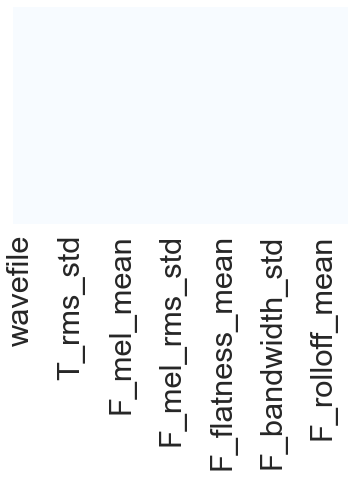

In [51]:
sn.heatmap(dataset.isnull(), yticklabels= False, cbar= False, cmap= 'Blues');

missing_df = dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Count']

# % of data present out of total
missing_df['Missing data %'] = round(missing_df['Missing Count'] / dataset.shape[0] * 100, 2)
missing_df = missing_df.sort_values('Missing data %',ascending=False).reset_index(drop = True)
missing_df

# Analysing data Distributions and majorities

In [6]:
column_headers = dataset.columns
feature_col = dataset.shape[1]
plt_col = 4
plt_row = (len(column_headers)/plt_col) + 1

fig = plt.figure(figsize=(20, 15))
plt.suptitle('Subtitle for diagram', fontsize=20)

for i in range(feature_col):
    plt.subplot(plt_row, plt_col, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    
    # This help ploting process easier
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset.iloc[:, i], bins=vals, color='#3F5D7D');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<ipython-input-6-c84a2cb66e9a>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(plt_row, plt_col, i + 1)


Error in callback <function flush_figures at 0x0000024F41210D30> (for post_execute):


KeyboardInterrupt: 

In [7]:
corr = dataset.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

<ipython-input-7-e54bcefb2c00>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Error in callback <function flush_figures at 0x0000024F41210D30> (for post_execute):


KeyboardInterrupt: 

## Funnel the dataset 

In [52]:
important_col =['is_normal', 'T_rms_mean', 'T_rms_std', 'T_zcr_mean',
               'F_mel_mean', 'F_mel_std', 'F_mel_rms_mean', 'F_mel_rms_std',
               'F_mfcc_mean', 'F_mfcc_std', 'F_flatness_mean',
               'F_bandwidth_mean', 'F_bandwidth_std', 'F_contrast_mean',
               'F_rolloff_mean', 'F_rolloff_std']
dataset = dataset_org[important_col]

## Split data

In [53]:
X = dataset.drop("is_normal", axis=1)
y = dataset["is_normal"]

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [54]:
print(X_model.shape)
print(y_model.shape)

(11259, 15)
(11259,)


## Resample over sample

In [55]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

## Feature Scaling 

In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Data visualization after feature manupulation

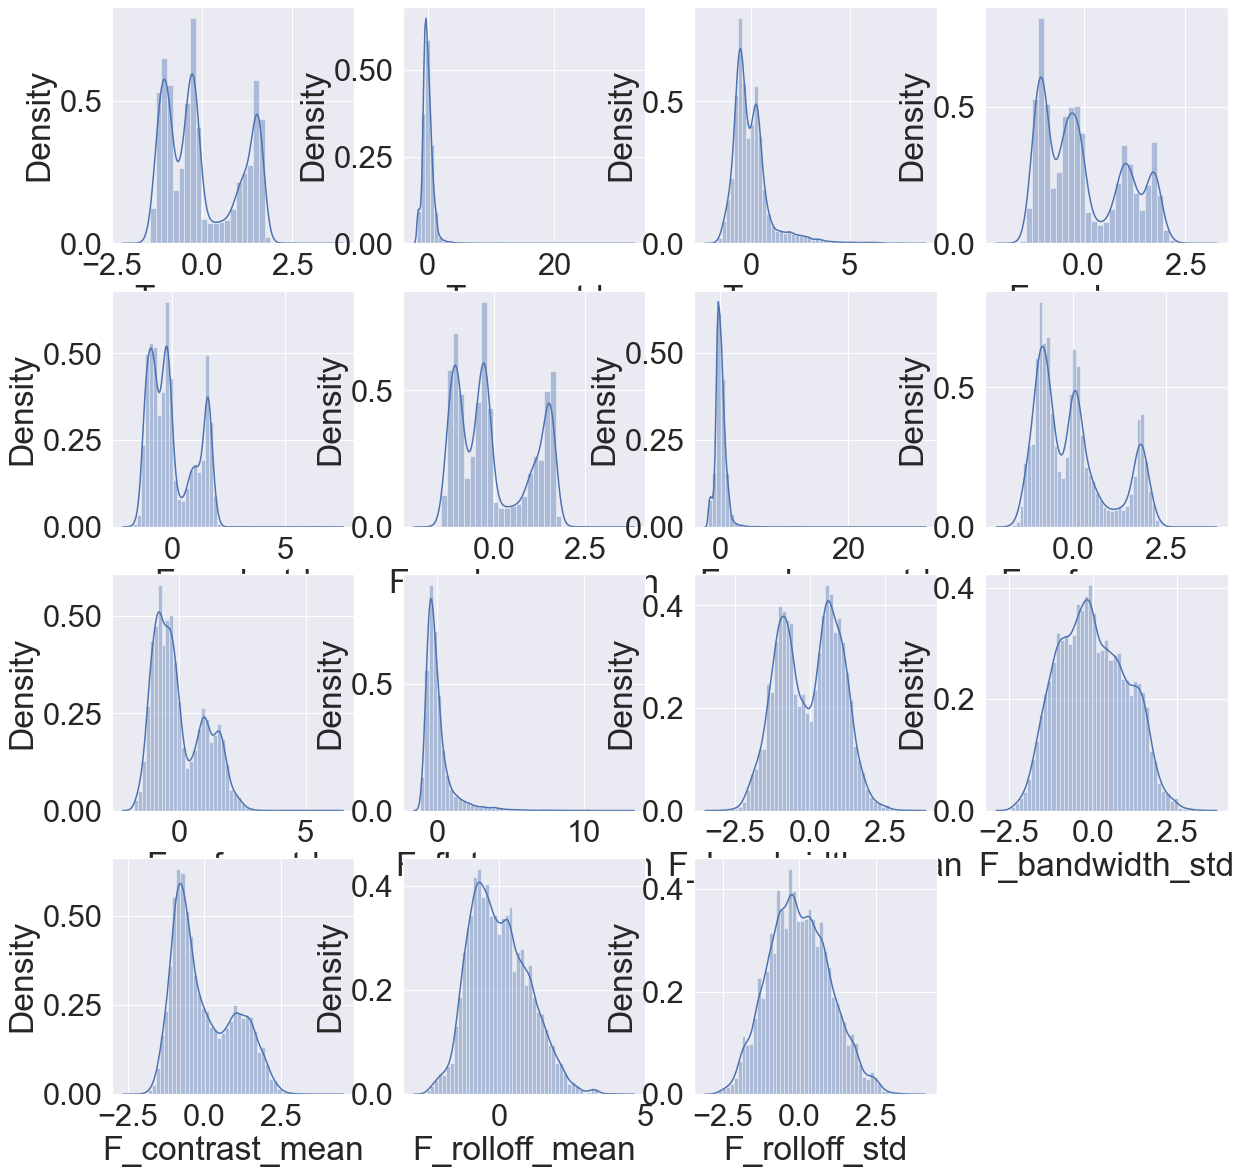

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

column_headers = X_train_scaled.columns
plt_col = 4
plt_row = int(len(column_headers)/plt_col) + 1 

i = 1
fig, ax = plt.subplots(2, plt_col, figsize = (20, 20))

for column_header in column_headers:
    plt.subplot(plt_row,plt_col,i)
    sn.distplot(X_train_scaled[column_header])
    i = i + 1

In [58]:
sn.pairplot(dataset, hue="is_normal");

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024F41210D30> (for post_execute):


KeyboardInterrupt: 

## Standarized the data point

In [ ]:
## Correlation every feature

corr = X_train_scaled.corr()
sn.set(font_scale=2.8)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (50,40))
sn.heatmap(corr, annot=True,mask=mask);

## Function to check perfomance

In [59]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

def perfomance_check(name: str):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    rec = recall_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
    f1 = f1_score(y_test, y_pred, pos_label='positive',
                                           average='micro')

    model_results = pd.DataFrame([[name, acc, prec, rec, f1]],
                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    return results.append(model_results, ignore_index = True)

def class_report(y_test, y_pred):

    # This is the script to compare result with prediction
    comparision = pd.DataFrame(columns = ['Result', 'Prediction'])
    
    if type(y_pred) == list:
        comparision.Prediction = y_pred

    else:
        try:
            comparision.Prediction = y_pred.tolist() #pd.Series(y_pred)
        except:
            comparision.Prediction = pd.Series(y_pred.reshape(len(y_pred),))
    comparision.Result = pd.Series(y_test.values.reshape(len(y_test),))
    
    target_names = []
    for i in y.unique():
        target_names.append(f"class {i}")
    y_true = comparision.Result.tolist()
    y_pred = comparision.Prediction.tolist()
    print(classification_report(y_true, y_pred, target_names=target_names))

results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

## Logical Regression (Default)

In [60]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = LR_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.69      0.70      0.69      1958
     class 1       0.70      0.70      0.70      2030

    accuracy                           0.70      3988
   macro avg       0.70      0.70      0.70      3988
weighted avg       0.70      0.70      0.70      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       148
     class 1       0.88      1.00      0.94      1103

    accuracy                           0.88      1251
   macro avg       0.44      0.50      0.47      1251
weighted avg       0.78      0.88      0.83      1251



## Logical Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = LR_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.67      0.68      0.67      1958
     class 1       0.68      0.67      0.68      2030

    accuracy                           0.68      3988
   macro avg       0.68      0.68      0.68      3988
weighted avg       0.68      0.68      0.68      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       148
     class 1       0.88      1.00      0.94      1103

    accuracy                           0.88      1251
   macro avg       0.44      0.50      0.47      1251
weighted avg       0.78      0.88      0.83      1251



## KNN (K-Nearest Neighbours)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)
    
    
    print("************************  Validation ************************")
    y_val_pred = KNN_classifier.predict(X_val)
    class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.84      0.98      0.91      1958
     class 1       0.98      0.82      0.89      2030

    accuracy                           0.90      3988
   macro avg       0.91      0.90      0.90      3988
weighted avg       0.91      0.90      0.90      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.05      0.01      0.01       148
     class 1       0.88      0.98      0.93      1103

    accuracy                           0.87      1251
   macro avg       0.46      0.49      0.47      1251
weighted avg       0.78      0.87      0.82      1251

              precision    recall  f1-score   support

     class 0       0.89      0.96      0.92      1958
     class 1       0.96      0.88      0.92      2030

    accuracy                           0.92      3988
   macro avg       0.92      0.92      0.92      3988
weighted avg

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [63]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = K_SVM_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.88      0.82      0.85      1958
     class 1       0.84      0.89      0.87      2030

    accuracy                           0.86      3988
   macro avg       0.86      0.86      0.86      3988
weighted avg       0.86      0.86      0.86      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       148
     class 1       0.88      1.00      0.94      1103

    accuracy                           0.88      1251
   macro avg       0.44      0.50      0.47      1251
weighted avg       0.78      0.88      0.83      1251



## Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = NB_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      1958
     class 1       0.51      1.00      0.67      2030

    accuracy                           0.51      3988
   macro avg       0.25      0.50      0.34      3988
weighted avg       0.26      0.51      0.34      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.13      0.74      0.22       148
     class 1       0.90      0.32      0.47      1103

    accuracy                           0.37      1251
   macro avg       0.52      0.53      0.35      1251
weighted avg       0.81      0.37      0.44      1251



## Decision Tree Classification

In [65]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = DTC_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.86      0.89      0.87      1958
     class 1       0.89      0.86      0.87      2030

    accuracy                           0.87      3988
   macro avg       0.87      0.87      0.87      3988
weighted avg       0.87      0.87      0.87      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.37      0.64      0.47       148
     class 1       0.95      0.86      0.90      1103

    accuracy                           0.83      1251
   macro avg       0.66      0.75      0.68      1251
weighted avg       0.88      0.83      0.85      1251



## Random Forest Classification

In [66]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = RF_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.94      0.94      0.94      1958
     class 1       0.94      0.94      0.94      2030

    accuracy                           0.94      3988
   macro avg       0.94      0.94      0.94      3988
weighted avg       0.94      0.94      0.94      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.59      0.69      0.64       148
     class 1       0.96      0.94      0.95      1103

    accuracy                           0.91      1251
   macro avg       0.77      0.81      0.79      1251
weighted avg       0.91      0.91      0.91      1251



## XGBoost Classifier

In [67]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = xgb_classifier.predict(X_val)
class_report(y_val, y_val_pred)

[13:39:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93      1958
     class 1       0.93      0.93      0.93      2030

    accuracy                           0.93      3988
   macro avg       0.93      0.93      0.93      3988
weighted avg       0.93      0.93      0.93      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.56      0.73      0.64       148
     class 1       0.96      0.92      0.94      1103

    accuracy                           0.90      1251
   macro avg       0.76      0.83      0.79      1251
weighted avg       0.91      0.90      0.91      1251



## CatBoost Classifier

In [68]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

Learning rate set to 0.033615
0:	learn: 0.6833067	total: 47.7ms	remaining: 47.7s
1:	learn: 0.6727848	total: 67.4ms	remaining: 33.6s
2:	learn: 0.6644370	total: 83.9ms	remaining: 27.9s
3:	learn: 0.6559419	total: 110ms	remaining: 27.4s
4:	learn: 0.6485092	total: 137ms	remaining: 27.2s
5:	learn: 0.6416259	total: 156ms	remaining: 25.9s
6:	learn: 0.6353894	total: 172ms	remaining: 24.5s
7:	learn: 0.6286303	total: 204ms	remaining: 25.2s
8:	learn: 0.6226136	total: 252ms	remaining: 27.8s
9:	learn: 0.6169814	total: 287ms	remaining: 28.4s
10:	learn: 0.6106022	total: 313ms	remaining: 28.1s
11:	learn: 0.6062690	total: 344ms	remaining: 28.3s
12:	learn: 0.6030471	total: 368ms	remaining: 27.9s
13:	learn: 0.5994631	total: 398ms	remaining: 28s
14:	learn: 0.5963741	total: 438ms	remaining: 28.8s
15:	learn: 0.5922154	total: 478ms	remaining: 29.4s
16:	learn: 0.5882394	total: 508ms	remaining: 29.4s
17:	learn: 0.5845220	total: 549ms	remaining: 29.9s
18:	learn: 0.5820943	total: 575ms	remaining: 29.7s
19:	learn:

160:	learn: 0.4147305	total: 4.65s	remaining: 24.3s
161:	learn: 0.4141145	total: 4.71s	remaining: 24.3s
162:	learn: 0.4134111	total: 4.74s	remaining: 24.3s
163:	learn: 0.4127972	total: 4.77s	remaining: 24.3s
164:	learn: 0.4124458	total: 4.8s	remaining: 24.3s
165:	learn: 0.4117923	total: 4.84s	remaining: 24.3s
166:	learn: 0.4114602	total: 4.86s	remaining: 24.3s
167:	learn: 0.4108685	total: 4.91s	remaining: 24.3s
168:	learn: 0.4102601	total: 5s	remaining: 24.6s
169:	learn: 0.4097609	total: 5.01s	remaining: 24.5s
170:	learn: 0.4093108	total: 5.04s	remaining: 24.5s
171:	learn: 0.4088718	total: 5.07s	remaining: 24.4s
172:	learn: 0.4084126	total: 5.13s	remaining: 24.5s
173:	learn: 0.4078216	total: 5.18s	remaining: 24.6s
174:	learn: 0.4072051	total: 5.2s	remaining: 24.5s
175:	learn: 0.4065270	total: 5.22s	remaining: 24.5s
176:	learn: 0.4060214	total: 5.25s	remaining: 24.4s
177:	learn: 0.4054511	total: 5.27s	remaining: 24.3s
178:	learn: 0.4049567	total: 5.32s	remaining: 24.4s
179:	learn: 0.404

319:	learn: 0.3394055	total: 10.9s	remaining: 23.2s
320:	learn: 0.3390530	total: 10.9s	remaining: 23.1s
321:	learn: 0.3388106	total: 11.1s	remaining: 23.3s
322:	learn: 0.3384424	total: 11.1s	remaining: 23.3s
323:	learn: 0.3378919	total: 11.2s	remaining: 23.3s
324:	learn: 0.3374874	total: 11.2s	remaining: 23.3s
325:	learn: 0.3371936	total: 11.3s	remaining: 23.3s
326:	learn: 0.3367812	total: 11.3s	remaining: 23.3s
327:	learn: 0.3363958	total: 11.4s	remaining: 23.3s
328:	learn: 0.3361319	total: 11.4s	remaining: 23.3s
329:	learn: 0.3357699	total: 11.5s	remaining: 23.3s
330:	learn: 0.3353152	total: 11.5s	remaining: 23.3s
331:	learn: 0.3347540	total: 11.6s	remaining: 23.3s
332:	learn: 0.3344482	total: 11.7s	remaining: 23.4s
333:	learn: 0.3340512	total: 11.7s	remaining: 23.3s
334:	learn: 0.3334460	total: 11.7s	remaining: 23.3s
335:	learn: 0.3330267	total: 11.8s	remaining: 23.4s
336:	learn: 0.3324560	total: 11.9s	remaining: 23.3s
337:	learn: 0.3320969	total: 11.9s	remaining: 23.3s
338:	learn: 

485:	learn: 0.2794636	total: 17.9s	remaining: 18.9s
486:	learn: 0.2792082	total: 17.9s	remaining: 18.9s
487:	learn: 0.2789608	total: 17.9s	remaining: 18.8s
488:	learn: 0.2787771	total: 18s	remaining: 18.8s
489:	learn: 0.2785129	total: 18s	remaining: 18.7s
490:	learn: 0.2783280	total: 18s	remaining: 18.7s
491:	learn: 0.2778961	total: 18s	remaining: 18.6s
492:	learn: 0.2777258	total: 18.1s	remaining: 18.6s
493:	learn: 0.2774881	total: 18.1s	remaining: 18.5s
494:	learn: 0.2772227	total: 18.1s	remaining: 18.5s
495:	learn: 0.2768978	total: 18.1s	remaining: 18.4s
496:	learn: 0.2766783	total: 18.2s	remaining: 18.4s
497:	learn: 0.2764348	total: 18.2s	remaining: 18.3s
498:	learn: 0.2762244	total: 18.2s	remaining: 18.3s
499:	learn: 0.2760368	total: 18.2s	remaining: 18.2s
500:	learn: 0.2757728	total: 18.3s	remaining: 18.2s
501:	learn: 0.2755004	total: 18.3s	remaining: 18.1s
502:	learn: 0.2751543	total: 18.3s	remaining: 18.1s
503:	learn: 0.2748953	total: 18.3s	remaining: 18.1s
504:	learn: 0.274575

645:	learn: 0.2381106	total: 22.3s	remaining: 12.2s
646:	learn: 0.2379436	total: 22.3s	remaining: 12.2s
647:	learn: 0.2377132	total: 22.4s	remaining: 12.1s
648:	learn: 0.2374329	total: 22.4s	remaining: 12.1s
649:	learn: 0.2372028	total: 22.4s	remaining: 12.1s
650:	learn: 0.2370641	total: 22.4s	remaining: 12s
651:	learn: 0.2368368	total: 22.4s	remaining: 12s
652:	learn: 0.2366556	total: 22.4s	remaining: 11.9s
653:	learn: 0.2365115	total: 22.5s	remaining: 11.9s
654:	learn: 0.2361960	total: 22.5s	remaining: 11.8s
655:	learn: 0.2359353	total: 22.5s	remaining: 11.8s
656:	learn: 0.2357344	total: 22.6s	remaining: 11.8s
657:	learn: 0.2356161	total: 22.6s	remaining: 11.7s
658:	learn: 0.2354082	total: 22.6s	remaining: 11.7s
659:	learn: 0.2352909	total: 22.6s	remaining: 11.7s
660:	learn: 0.2351374	total: 22.6s	remaining: 11.6s
661:	learn: 0.2349877	total: 22.7s	remaining: 11.6s
662:	learn: 0.2347699	total: 22.7s	remaining: 11.5s
663:	learn: 0.2345545	total: 22.8s	remaining: 11.5s
664:	learn: 0.23

809:	learn: 0.2059411	total: 29.3s	remaining: 6.86s
810:	learn: 0.2058030	total: 29.3s	remaining: 6.83s
811:	learn: 0.2055945	total: 29.4s	remaining: 6.8s
812:	learn: 0.2054921	total: 29.4s	remaining: 6.76s
813:	learn: 0.2053092	total: 29.5s	remaining: 6.73s
814:	learn: 0.2051363	total: 29.5s	remaining: 6.7s
815:	learn: 0.2049461	total: 29.6s	remaining: 6.67s
816:	learn: 0.2047788	total: 29.6s	remaining: 6.64s
817:	learn: 0.2046270	total: 29.7s	remaining: 6.6s
818:	learn: 0.2043497	total: 29.7s	remaining: 6.56s
819:	learn: 0.2042252	total: 29.7s	remaining: 6.53s
820:	learn: 0.2039829	total: 29.8s	remaining: 6.49s
821:	learn: 0.2038089	total: 29.8s	remaining: 6.45s
822:	learn: 0.2035775	total: 29.8s	remaining: 6.42s
823:	learn: 0.2034283	total: 29.9s	remaining: 6.38s
824:	learn: 0.2032060	total: 29.9s	remaining: 6.34s
825:	learn: 0.2029821	total: 30s	remaining: 6.31s
826:	learn: 0.2027987	total: 30s	remaining: 6.27s
827:	learn: 0.2025446	total: 30s	remaining: 6.24s
828:	learn: 0.2022982

973:	learn: 0.1798871	total: 35.5s	remaining: 949ms
974:	learn: 0.1797204	total: 35.6s	remaining: 912ms
975:	learn: 0.1795819	total: 35.6s	remaining: 875ms
976:	learn: 0.1794421	total: 35.6s	remaining: 839ms
977:	learn: 0.1792922	total: 35.6s	remaining: 802ms
978:	learn: 0.1792259	total: 35.7s	remaining: 765ms
979:	learn: 0.1791332	total: 35.7s	remaining: 728ms
980:	learn: 0.1790681	total: 35.7s	remaining: 692ms
981:	learn: 0.1789414	total: 35.7s	remaining: 655ms
982:	learn: 0.1787502	total: 35.8s	remaining: 619ms
983:	learn: 0.1786772	total: 35.8s	remaining: 583ms
984:	learn: 0.1785484	total: 35.9s	remaining: 546ms
985:	learn: 0.1783659	total: 35.9s	remaining: 510ms
986:	learn: 0.1782087	total: 35.9s	remaining: 473ms
987:	learn: 0.1780473	total: 36s	remaining: 437ms
988:	learn: 0.1778842	total: 36s	remaining: 401ms
989:	learn: 0.1777559	total: 36s	remaining: 364ms
990:	learn: 0.1775646	total: 36.1s	remaining: 328ms
991:	learn: 0.1773837	total: 36.1s	remaining: 291ms
992:	learn: 0.1772

In [69]:
class_report(y_test, y_pred)


print("************************  Validation ************************")
y_val_pred = CB_classifier.predict(X_val)
class_report(y_val, y_val_pred)

              precision    recall  f1-score   support

     class 0       0.93      0.92      0.92      1958
     class 1       0.93      0.93      0.93      2030

    accuracy                           0.93      3988
   macro avg       0.93      0.93      0.93      3988
weighted avg       0.93      0.93      0.93      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.62      0.74      0.67       148
     class 1       0.96      0.94      0.95      1103

    accuracy                           0.91      1251
   macro avg       0.79      0.84      0.81      1251
weighted avg       0.92      0.91      0.92      1251



In [70]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logical Regression (Default),0.696590,0.696590,0.696590,0.696590
1,Logical Regression (Lasso),0.675527,0.675527,0.675527,0.675527
2,K-Nearest Neighbours 2,0.899699,0.899699,0.899699,0.899699
3,K-Nearest Neighbours 3,0.919759,0.919759,0.919759,0.919759
4,K-Nearest Neighbours 4,0.896941,0.896941,0.896941,0.896941
5,K-Nearest Neighbours 5,0.905968,0.905968,0.905968,0.905968
6,SVM (RBF),0.858576,0.858576,0.858576,0.858576
7,Naive Bayes,0.509027,0.509027,0.509027,0.509027
8,Decision Tree Classification,0.873621,0.873621,0.873621,0.873621
9,Random Forest (n=100),0.940321,0.940321,0.940321,0.940321


---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [29]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier]  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator =model_lst[i] , X = X_train, y = y_train.values.ravel(), cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

[10:49:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:49:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

120:	learn: 0.4455868	total: 1.78s	remaining: 13s
121:	learn: 0.4450675	total: 1.8s	remaining: 13s
122:	learn: 0.4441688	total: 1.82s	remaining: 13s
123:	learn: 0.4436387	total: 1.83s	remaining: 12.9s
124:	learn: 0.4428238	total: 1.85s	remaining: 12.9s
125:	learn: 0.4423035	total: 1.86s	remaining: 12.9s
126:	learn: 0.4414772	total: 1.87s	remaining: 12.9s
127:	learn: 0.4406222	total: 1.89s	remaining: 12.9s
128:	learn: 0.4398599	total: 1.91s	remaining: 12.9s
129:	learn: 0.4392407	total: 1.92s	remaining: 12.8s
130:	learn: 0.4386756	total: 1.93s	remaining: 12.8s
131:	learn: 0.4378692	total: 1.95s	remaining: 12.8s
132:	learn: 0.4371776	total: 1.96s	remaining: 12.8s
133:	learn: 0.4364115	total: 1.97s	remaining: 12.8s
134:	learn: 0.4354943	total: 1.99s	remaining: 12.8s
135:	learn: 0.4346650	total: 2.01s	remaining: 12.8s
136:	learn: 0.4339670	total: 2.02s	remaining: 12.7s
137:	learn: 0.4331511	total: 2.04s	remaining: 12.8s
138:	learn: 0.4322307	total: 2.07s	remaining: 12.8s
139:	learn: 0.43182

290:	learn: 0.3549046	total: 4.61s	remaining: 11.2s
291:	learn: 0.3544315	total: 4.63s	remaining: 11.2s
292:	learn: 0.3538964	total: 4.64s	remaining: 11.2s
293:	learn: 0.3535246	total: 4.66s	remaining: 11.2s
294:	learn: 0.3531978	total: 4.67s	remaining: 11.2s
295:	learn: 0.3527450	total: 4.68s	remaining: 11.1s
296:	learn: 0.3523930	total: 4.7s	remaining: 11.1s
297:	learn: 0.3520063	total: 4.71s	remaining: 11.1s
298:	learn: 0.3516736	total: 4.72s	remaining: 11.1s
299:	learn: 0.3512160	total: 4.74s	remaining: 11.1s
300:	learn: 0.3508689	total: 4.75s	remaining: 11s
301:	learn: 0.3504881	total: 4.77s	remaining: 11s
302:	learn: 0.3502678	total: 4.79s	remaining: 11s
303:	learn: 0.3498931	total: 4.8s	remaining: 11s
304:	learn: 0.3494920	total: 4.82s	remaining: 11s
305:	learn: 0.3491277	total: 4.84s	remaining: 11s
306:	learn: 0.3485148	total: 4.85s	remaining: 10.9s
307:	learn: 0.3481155	total: 4.86s	remaining: 10.9s
308:	learn: 0.3476973	total: 4.88s	remaining: 10.9s
309:	learn: 0.3473580	tota

453:	learn: 0.2915221	total: 7.23s	remaining: 8.7s
454:	learn: 0.2912472	total: 7.26s	remaining: 8.69s
455:	learn: 0.2909425	total: 7.27s	remaining: 8.67s
456:	learn: 0.2906245	total: 7.28s	remaining: 8.65s
457:	learn: 0.2903057	total: 7.3s	remaining: 8.64s
458:	learn: 0.2901489	total: 7.31s	remaining: 8.62s
459:	learn: 0.2898109	total: 7.33s	remaining: 8.6s
460:	learn: 0.2894321	total: 7.34s	remaining: 8.59s
461:	learn: 0.2892286	total: 7.36s	remaining: 8.57s
462:	learn: 0.2890339	total: 7.37s	remaining: 8.55s
463:	learn: 0.2887195	total: 7.39s	remaining: 8.54s
464:	learn: 0.2883743	total: 7.4s	remaining: 8.52s
465:	learn: 0.2881071	total: 7.42s	remaining: 8.5s
466:	learn: 0.2876938	total: 7.44s	remaining: 8.49s
467:	learn: 0.2874573	total: 7.45s	remaining: 8.47s
468:	learn: 0.2871048	total: 7.47s	remaining: 8.46s
469:	learn: 0.2868310	total: 7.48s	remaining: 8.44s
470:	learn: 0.2865318	total: 7.5s	remaining: 8.42s
471:	learn: 0.2862571	total: 7.51s	remaining: 8.4s
472:	learn: 0.28602

623:	learn: 0.2454570	total: 9.81s	remaining: 5.91s
624:	learn: 0.2453052	total: 9.83s	remaining: 5.9s
625:	learn: 0.2450907	total: 9.84s	remaining: 5.88s
626:	learn: 0.2448504	total: 9.86s	remaining: 5.87s
627:	learn: 0.2445943	total: 9.87s	remaining: 5.85s
628:	learn: 0.2443084	total: 9.89s	remaining: 5.83s
629:	learn: 0.2440954	total: 9.9s	remaining: 5.82s
630:	learn: 0.2438748	total: 9.92s	remaining: 5.8s
631:	learn: 0.2437150	total: 9.93s	remaining: 5.78s
632:	learn: 0.2434643	total: 9.95s	remaining: 5.77s
633:	learn: 0.2431917	total: 9.96s	remaining: 5.75s
634:	learn: 0.2428302	total: 9.98s	remaining: 5.73s
635:	learn: 0.2426708	total: 9.99s	remaining: 5.72s
636:	learn: 0.2424210	total: 10s	remaining: 5.71s
637:	learn: 0.2422042	total: 10s	remaining: 5.69s
638:	learn: 0.2420350	total: 10s	remaining: 5.67s
639:	learn: 0.2417037	total: 10.1s	remaining: 5.66s
640:	learn: 0.2414196	total: 10.1s	remaining: 5.64s
641:	learn: 0.2410670	total: 10.1s	remaining: 5.63s
642:	learn: 0.2408643

783:	learn: 0.2122766	total: 12.2s	remaining: 3.37s
784:	learn: 0.2121626	total: 12.2s	remaining: 3.35s
785:	learn: 0.2119629	total: 12.3s	remaining: 3.34s
786:	learn: 0.2118243	total: 12.3s	remaining: 3.32s
787:	learn: 0.2116643	total: 12.3s	remaining: 3.31s
788:	learn: 0.2115404	total: 12.3s	remaining: 3.29s
789:	learn: 0.2113659	total: 12.3s	remaining: 3.27s
790:	learn: 0.2112021	total: 12.3s	remaining: 3.26s
791:	learn: 0.2109022	total: 12.3s	remaining: 3.24s
792:	learn: 0.2107390	total: 12.4s	remaining: 3.23s
793:	learn: 0.2105425	total: 12.4s	remaining: 3.21s
794:	learn: 0.2103506	total: 12.4s	remaining: 3.19s
795:	learn: 0.2101604	total: 12.4s	remaining: 3.18s
796:	learn: 0.2100147	total: 12.4s	remaining: 3.16s
797:	learn: 0.2098694	total: 12.4s	remaining: 3.15s
798:	learn: 0.2097286	total: 12.4s	remaining: 3.13s
799:	learn: 0.2095865	total: 12.5s	remaining: 3.11s
800:	learn: 0.2094418	total: 12.5s	remaining: 3.1s
801:	learn: 0.2092761	total: 12.5s	remaining: 3.08s
802:	learn: 0

949:	learn: 0.1852344	total: 14.6s	remaining: 769ms
950:	learn: 0.1850539	total: 14.6s	remaining: 754ms
951:	learn: 0.1848925	total: 14.6s	remaining: 738ms
952:	learn: 0.1847211	total: 14.7s	remaining: 723ms
953:	learn: 0.1845722	total: 14.7s	remaining: 708ms
954:	learn: 0.1844204	total: 14.7s	remaining: 692ms
955:	learn: 0.1842855	total: 14.7s	remaining: 677ms
956:	learn: 0.1841482	total: 14.7s	remaining: 661ms
957:	learn: 0.1839386	total: 14.7s	remaining: 646ms
958:	learn: 0.1838233	total: 14.7s	remaining: 630ms
959:	learn: 0.1837052	total: 14.8s	remaining: 615ms
960:	learn: 0.1835554	total: 14.8s	remaining: 600ms
961:	learn: 0.1834273	total: 14.8s	remaining: 584ms
962:	learn: 0.1832928	total: 14.8s	remaining: 569ms
963:	learn: 0.1832029	total: 14.8s	remaining: 553ms
964:	learn: 0.1830523	total: 14.8s	remaining: 538ms
965:	learn: 0.1828746	total: 14.8s	remaining: 523ms
966:	learn: 0.1827784	total: 14.9s	remaining: 507ms
967:	learn: 0.1826781	total: 14.9s	remaining: 492ms
968:	learn: 

118:	learn: 0.4461366	total: 1.77s	remaining: 13.1s
119:	learn: 0.4455911	total: 1.79s	remaining: 13.2s
120:	learn: 0.4446328	total: 1.81s	remaining: 13.1s
121:	learn: 0.4437666	total: 1.82s	remaining: 13.1s
122:	learn: 0.4429211	total: 1.84s	remaining: 13.1s
123:	learn: 0.4424416	total: 1.85s	remaining: 13.1s
124:	learn: 0.4418727	total: 1.87s	remaining: 13.1s
125:	learn: 0.4411902	total: 1.88s	remaining: 13s
126:	learn: 0.4403832	total: 1.89s	remaining: 13s
127:	learn: 0.4396144	total: 1.91s	remaining: 13s
128:	learn: 0.4389581	total: 1.92s	remaining: 13s
129:	learn: 0.4382949	total: 1.94s	remaining: 13s
130:	learn: 0.4374407	total: 1.96s	remaining: 13s
131:	learn: 0.4366985	total: 1.98s	remaining: 13s
132:	learn: 0.4358015	total: 1.99s	remaining: 13s
133:	learn: 0.4353025	total: 2s	remaining: 12.9s
134:	learn: 0.4345281	total: 2.02s	remaining: 12.9s
135:	learn: 0.4336344	total: 2.03s	remaining: 12.9s
136:	learn: 0.4328907	total: 2.05s	remaining: 12.9s
137:	learn: 0.4320950	total: 2.

286:	learn: 0.3555641	total: 4.35s	remaining: 10.8s
287:	learn: 0.3552568	total: 4.36s	remaining: 10.8s
288:	learn: 0.3549023	total: 4.38s	remaining: 10.8s
289:	learn: 0.3545102	total: 4.39s	remaining: 10.8s
290:	learn: 0.3540293	total: 4.41s	remaining: 10.7s
291:	learn: 0.3535175	total: 4.42s	remaining: 10.7s
292:	learn: 0.3529317	total: 4.44s	remaining: 10.7s
293:	learn: 0.3525452	total: 4.46s	remaining: 10.7s
294:	learn: 0.3521531	total: 4.47s	remaining: 10.7s
295:	learn: 0.3515870	total: 4.49s	remaining: 10.7s
296:	learn: 0.3509931	total: 4.5s	remaining: 10.7s
297:	learn: 0.3505654	total: 4.52s	remaining: 10.6s
298:	learn: 0.3499912	total: 4.53s	remaining: 10.6s
299:	learn: 0.3495736	total: 4.55s	remaining: 10.6s
300:	learn: 0.3493394	total: 4.57s	remaining: 10.6s
301:	learn: 0.3487099	total: 4.58s	remaining: 10.6s
302:	learn: 0.3483071	total: 4.6s	remaining: 10.6s
303:	learn: 0.3479106	total: 4.61s	remaining: 10.6s
304:	learn: 0.3474027	total: 4.63s	remaining: 10.5s
305:	learn: 0.

445:	learn: 0.2935871	total: 6.97s	remaining: 8.66s
446:	learn: 0.2931906	total: 6.99s	remaining: 8.64s
447:	learn: 0.2928256	total: 7.01s	remaining: 8.63s
448:	learn: 0.2925219	total: 7.02s	remaining: 8.62s
449:	learn: 0.2922352	total: 7.04s	remaining: 8.6s
450:	learn: 0.2918968	total: 7.05s	remaining: 8.58s
451:	learn: 0.2915843	total: 7.07s	remaining: 8.57s
452:	learn: 0.2912804	total: 7.08s	remaining: 8.55s
453:	learn: 0.2908082	total: 7.09s	remaining: 8.53s
454:	learn: 0.2904765	total: 7.11s	remaining: 8.52s
455:	learn: 0.2902352	total: 7.13s	remaining: 8.5s
456:	learn: 0.2899529	total: 7.14s	remaining: 8.48s
457:	learn: 0.2896940	total: 7.16s	remaining: 8.47s
458:	learn: 0.2894446	total: 7.18s	remaining: 8.46s
459:	learn: 0.2891216	total: 7.19s	remaining: 8.44s
460:	learn: 0.2888788	total: 7.21s	remaining: 8.43s
461:	learn: 0.2886588	total: 7.22s	remaining: 8.41s
462:	learn: 0.2883113	total: 7.24s	remaining: 8.39s
463:	learn: 0.2879853	total: 7.25s	remaining: 8.38s
464:	learn: 0.

613:	learn: 0.2457633	total: 9.55s	remaining: 6s
614:	learn: 0.2455811	total: 9.57s	remaining: 5.99s
615:	learn: 0.2454699	total: 9.59s	remaining: 5.97s
616:	learn: 0.2453032	total: 9.6s	remaining: 5.96s
617:	learn: 0.2450689	total: 9.61s	remaining: 5.94s
618:	learn: 0.2448734	total: 9.63s	remaining: 5.93s
619:	learn: 0.2447232	total: 9.65s	remaining: 5.91s
620:	learn: 0.2443630	total: 9.66s	remaining: 5.9s
621:	learn: 0.2441778	total: 9.68s	remaining: 5.88s
622:	learn: 0.2439244	total: 9.69s	remaining: 5.87s
623:	learn: 0.2436455	total: 9.71s	remaining: 5.85s
624:	learn: 0.2434584	total: 9.72s	remaining: 5.83s
625:	learn: 0.2431430	total: 9.74s	remaining: 5.82s
626:	learn: 0.2429091	total: 9.76s	remaining: 5.8s
627:	learn: 0.2426499	total: 9.77s	remaining: 5.79s
628:	learn: 0.2424276	total: 9.79s	remaining: 5.77s
629:	learn: 0.2422326	total: 9.8s	remaining: 5.75s
630:	learn: 0.2420010	total: 9.81s	remaining: 5.74s
631:	learn: 0.2418022	total: 9.83s	remaining: 5.72s
632:	learn: 0.24162

780:	learn: 0.2116391	total: 12.1s	remaining: 3.4s
781:	learn: 0.2115117	total: 12.1s	remaining: 3.38s
782:	learn: 0.2113726	total: 12.1s	remaining: 3.37s
783:	learn: 0.2111976	total: 12.2s	remaining: 3.35s
784:	learn: 0.2109677	total: 12.2s	remaining: 3.33s
785:	learn: 0.2106844	total: 12.2s	remaining: 3.32s
786:	learn: 0.2104740	total: 12.2s	remaining: 3.3s
787:	learn: 0.2102138	total: 12.2s	remaining: 3.29s
788:	learn: 0.2100655	total: 12.2s	remaining: 3.27s
789:	learn: 0.2098543	total: 12.2s	remaining: 3.25s
790:	learn: 0.2096105	total: 12.3s	remaining: 3.24s
791:	learn: 0.2093941	total: 12.3s	remaining: 3.22s
792:	learn: 0.2092501	total: 12.3s	remaining: 3.21s
793:	learn: 0.2090529	total: 12.3s	remaining: 3.19s
794:	learn: 0.2088587	total: 12.3s	remaining: 3.18s
795:	learn: 0.2087200	total: 12.3s	remaining: 3.16s
796:	learn: 0.2085290	total: 12.4s	remaining: 3.15s
797:	learn: 0.2082633	total: 12.4s	remaining: 3.13s
798:	learn: 0.2081112	total: 12.4s	remaining: 3.11s
799:	learn: 0.

941:	learn: 0.1843027	total: 14.5s	remaining: 895ms
942:	learn: 0.1841697	total: 14.5s	remaining: 879ms
943:	learn: 0.1840387	total: 14.6s	remaining: 864ms
944:	learn: 0.1839434	total: 14.6s	remaining: 849ms
945:	learn: 0.1838552	total: 14.6s	remaining: 833ms
946:	learn: 0.1837438	total: 14.6s	remaining: 818ms
947:	learn: 0.1835921	total: 14.6s	remaining: 802ms
948:	learn: 0.1833779	total: 14.6s	remaining: 787ms
949:	learn: 0.1832502	total: 14.7s	remaining: 771ms
950:	learn: 0.1831293	total: 14.7s	remaining: 756ms
951:	learn: 0.1829798	total: 14.7s	remaining: 740ms
952:	learn: 0.1828727	total: 14.7s	remaining: 725ms
953:	learn: 0.1827368	total: 14.7s	remaining: 709ms
954:	learn: 0.1825420	total: 14.7s	remaining: 694ms
955:	learn: 0.1823866	total: 14.7s	remaining: 679ms
956:	learn: 0.1822514	total: 14.8s	remaining: 663ms
957:	learn: 0.1821367	total: 14.8s	remaining: 648ms
958:	learn: 0.1819931	total: 14.8s	remaining: 632ms
959:	learn: 0.1818989	total: 14.8s	remaining: 617ms
960:	learn: 

107:	learn: 0.4535090	total: 1.63s	remaining: 13.5s
108:	learn: 0.4525930	total: 1.65s	remaining: 13.5s
109:	learn: 0.4519129	total: 1.66s	remaining: 13.4s
110:	learn: 0.4514663	total: 1.68s	remaining: 13.4s
111:	learn: 0.4509569	total: 1.69s	remaining: 13.4s
112:	learn: 0.4502435	total: 1.71s	remaining: 13.4s
113:	learn: 0.4491851	total: 1.72s	remaining: 13.4s
114:	learn: 0.4485407	total: 1.73s	remaining: 13.3s
115:	learn: 0.4478661	total: 1.75s	remaining: 13.3s
116:	learn: 0.4470046	total: 1.76s	remaining: 13.3s
117:	learn: 0.4462115	total: 1.78s	remaining: 13.3s
118:	learn: 0.4454701	total: 1.79s	remaining: 13.3s
119:	learn: 0.4449235	total: 1.81s	remaining: 13.3s
120:	learn: 0.4442180	total: 1.83s	remaining: 13.3s
121:	learn: 0.4434652	total: 1.85s	remaining: 13.3s
122:	learn: 0.4428698	total: 1.86s	remaining: 13.3s
123:	learn: 0.4422685	total: 1.88s	remaining: 13.3s
124:	learn: 0.4413487	total: 1.89s	remaining: 13.3s
125:	learn: 0.4408799	total: 1.91s	remaining: 13.2s
126:	learn: 

274:	learn: 0.3583490	total: 4.21s	remaining: 11.1s
275:	learn: 0.3580037	total: 4.22s	remaining: 11.1s
276:	learn: 0.3575468	total: 4.24s	remaining: 11.1s
277:	learn: 0.3570379	total: 4.25s	remaining: 11.1s
278:	learn: 0.3566513	total: 4.27s	remaining: 11s
279:	learn: 0.3562732	total: 4.28s	remaining: 11s
280:	learn: 0.3557909	total: 4.3s	remaining: 11s
281:	learn: 0.3555773	total: 4.31s	remaining: 11s
282:	learn: 0.3553046	total: 4.33s	remaining: 11s
283:	learn: 0.3547732	total: 4.34s	remaining: 10.9s
284:	learn: 0.3544043	total: 4.35s	remaining: 10.9s
285:	learn: 0.3540536	total: 4.37s	remaining: 10.9s
286:	learn: 0.3536144	total: 4.38s	remaining: 10.9s
287:	learn: 0.3532295	total: 4.4s	remaining: 10.9s
288:	learn: 0.3528991	total: 4.41s	remaining: 10.9s
289:	learn: 0.3526419	total: 4.43s	remaining: 10.8s
290:	learn: 0.3523039	total: 4.44s	remaining: 10.8s
291:	learn: 0.3519197	total: 4.46s	remaining: 10.8s
292:	learn: 0.3516683	total: 4.47s	remaining: 10.8s
293:	learn: 0.3513090	to

434:	learn: 0.2958921	total: 6.81s	remaining: 8.85s
435:	learn: 0.2956033	total: 6.83s	remaining: 8.83s
436:	learn: 0.2952968	total: 6.84s	remaining: 8.82s
437:	learn: 0.2949381	total: 6.86s	remaining: 8.8s
438:	learn: 0.2947112	total: 6.88s	remaining: 8.79s
439:	learn: 0.2942272	total: 6.89s	remaining: 8.77s
440:	learn: 0.2939360	total: 6.91s	remaining: 8.75s
441:	learn: 0.2936953	total: 6.92s	remaining: 8.73s
442:	learn: 0.2932930	total: 6.93s	remaining: 8.72s
443:	learn: 0.2929309	total: 6.95s	remaining: 8.7s
444:	learn: 0.2925305	total: 6.96s	remaining: 8.68s
445:	learn: 0.2920640	total: 6.98s	remaining: 8.67s
446:	learn: 0.2916728	total: 6.99s	remaining: 8.65s
447:	learn: 0.2913649	total: 7.02s	remaining: 8.65s
448:	learn: 0.2909513	total: 7.03s	remaining: 8.63s
449:	learn: 0.2907274	total: 7.05s	remaining: 8.62s
450:	learn: 0.2903726	total: 7.06s	remaining: 8.6s
451:	learn: 0.2900788	total: 7.08s	remaining: 8.58s
452:	learn: 0.2896604	total: 7.1s	remaining: 8.57s
453:	learn: 0.28

604:	learn: 0.2484508	total: 9.4s	remaining: 6.14s
605:	learn: 0.2482607	total: 9.42s	remaining: 6.13s
606:	learn: 0.2479925	total: 9.44s	remaining: 6.11s
607:	learn: 0.2477488	total: 9.46s	remaining: 6.1s
608:	learn: 0.2476077	total: 9.47s	remaining: 6.08s
609:	learn: 0.2473844	total: 9.49s	remaining: 6.07s
610:	learn: 0.2472065	total: 9.5s	remaining: 6.05s
611:	learn: 0.2470436	total: 9.52s	remaining: 6.03s
612:	learn: 0.2468011	total: 9.53s	remaining: 6.02s
613:	learn: 0.2464775	total: 9.55s	remaining: 6s
614:	learn: 0.2462358	total: 9.56s	remaining: 5.99s
615:	learn: 0.2460746	total: 9.58s	remaining: 5.97s
616:	learn: 0.2458432	total: 9.6s	remaining: 5.96s
617:	learn: 0.2455676	total: 9.62s	remaining: 5.95s
618:	learn: 0.2453994	total: 9.64s	remaining: 5.93s
619:	learn: 0.2451189	total: 9.65s	remaining: 5.92s
620:	learn: 0.2449041	total: 9.67s	remaining: 5.9s
621:	learn: 0.2446306	total: 9.68s	remaining: 5.88s
622:	learn: 0.2443665	total: 9.7s	remaining: 5.87s
623:	learn: 0.2442258

771:	learn: 0.2135241	total: 12s	remaining: 3.54s
772:	learn: 0.2134104	total: 12s	remaining: 3.53s
773:	learn: 0.2132456	total: 12s	remaining: 3.51s
774:	learn: 0.2130905	total: 12s	remaining: 3.5s
775:	learn: 0.2128076	total: 12.1s	remaining: 3.48s
776:	learn: 0.2126645	total: 12.1s	remaining: 3.46s
777:	learn: 0.2125111	total: 12.1s	remaining: 3.45s
778:	learn: 0.2123360	total: 12.1s	remaining: 3.43s
779:	learn: 0.2121580	total: 12.1s	remaining: 3.42s
780:	learn: 0.2119955	total: 12.1s	remaining: 3.4s
781:	learn: 0.2117513	total: 12.1s	remaining: 3.39s
782:	learn: 0.2115610	total: 12.2s	remaining: 3.37s
783:	learn: 0.2114284	total: 12.2s	remaining: 3.35s
784:	learn: 0.2112911	total: 12.2s	remaining: 3.34s
785:	learn: 0.2110428	total: 12.2s	remaining: 3.33s
786:	learn: 0.2109091	total: 12.2s	remaining: 3.31s
787:	learn: 0.2107665	total: 12.2s	remaining: 3.29s
788:	learn: 0.2106299	total: 12.3s	remaining: 3.28s
789:	learn: 0.2104520	total: 12.3s	remaining: 3.26s
790:	learn: 0.2102715	

941:	learn: 0.1859277	total: 14.6s	remaining: 897ms
942:	learn: 0.1857484	total: 14.6s	remaining: 882ms
943:	learn: 0.1856146	total: 14.6s	remaining: 867ms
944:	learn: 0.1855226	total: 14.6s	remaining: 851ms
945:	learn: 0.1853813	total: 14.6s	remaining: 836ms
946:	learn: 0.1852383	total: 14.7s	remaining: 820ms
947:	learn: 0.1849898	total: 14.7s	remaining: 805ms
948:	learn: 0.1848485	total: 14.7s	remaining: 789ms
949:	learn: 0.1846853	total: 14.7s	remaining: 774ms
950:	learn: 0.1845491	total: 14.7s	remaining: 758ms
951:	learn: 0.1844548	total: 14.7s	remaining: 742ms
952:	learn: 0.1842477	total: 14.7s	remaining: 727ms
953:	learn: 0.1841257	total: 14.8s	remaining: 712ms
954:	learn: 0.1840532	total: 14.8s	remaining: 696ms
955:	learn: 0.1838153	total: 14.8s	remaining: 681ms
956:	learn: 0.1836614	total: 14.8s	remaining: 666ms
957:	learn: 0.1835047	total: 14.8s	remaining: 650ms
958:	learn: 0.1834085	total: 14.8s	remaining: 634ms
959:	learn: 0.1831904	total: 14.9s	remaining: 619ms
960:	learn: 

103:	learn: 0.4582095	total: 1.58s	remaining: 13.6s
104:	learn: 0.4573925	total: 1.6s	remaining: 13.6s
105:	learn: 0.4569247	total: 1.61s	remaining: 13.6s
106:	learn: 0.4562728	total: 1.62s	remaining: 13.6s
107:	learn: 0.4555732	total: 1.64s	remaining: 13.5s
108:	learn: 0.4545025	total: 1.65s	remaining: 13.5s
109:	learn: 0.4533804	total: 1.67s	remaining: 13.5s
110:	learn: 0.4526353	total: 1.68s	remaining: 13.5s
111:	learn: 0.4520179	total: 1.7s	remaining: 13.5s
112:	learn: 0.4511588	total: 1.71s	remaining: 13.4s
113:	learn: 0.4503137	total: 1.73s	remaining: 13.4s
114:	learn: 0.4496529	total: 1.75s	remaining: 13.4s
115:	learn: 0.4486239	total: 1.76s	remaining: 13.4s
116:	learn: 0.4478204	total: 1.78s	remaining: 13.4s
117:	learn: 0.4471892	total: 1.79s	remaining: 13.4s
118:	learn: 0.4463477	total: 1.81s	remaining: 13.4s
119:	learn: 0.4453634	total: 1.82s	remaining: 13.4s
120:	learn: 0.4445939	total: 1.84s	remaining: 13.4s
121:	learn: 0.4437898	total: 1.86s	remaining: 13.4s
122:	learn: 0.

265:	learn: 0.3649243	total: 4.16s	remaining: 11.5s
266:	learn: 0.3644905	total: 4.18s	remaining: 11.5s
267:	learn: 0.3640385	total: 4.2s	remaining: 11.5s
268:	learn: 0.3635683	total: 4.21s	remaining: 11.4s
269:	learn: 0.3631483	total: 4.23s	remaining: 11.4s
270:	learn: 0.3626279	total: 4.24s	remaining: 11.4s
271:	learn: 0.3623528	total: 4.26s	remaining: 11.4s
272:	learn: 0.3619842	total: 4.27s	remaining: 11.4s
273:	learn: 0.3616619	total: 4.29s	remaining: 11.4s
274:	learn: 0.3610404	total: 4.3s	remaining: 11.3s
275:	learn: 0.3604861	total: 4.32s	remaining: 11.3s
276:	learn: 0.3598881	total: 4.34s	remaining: 11.3s
277:	learn: 0.3594527	total: 4.38s	remaining: 11.4s
278:	learn: 0.3590986	total: 4.39s	remaining: 11.4s
279:	learn: 0.3586272	total: 4.41s	remaining: 11.3s
280:	learn: 0.3581158	total: 4.42s	remaining: 11.3s
281:	learn: 0.3577647	total: 4.44s	remaining: 11.3s
282:	learn: 0.3572608	total: 4.45s	remaining: 11.3s
283:	learn: 0.3569894	total: 4.47s	remaining: 11.3s
284:	learn: 0.

428:	learn: 0.2987247	total: 6.79s	remaining: 9.04s
429:	learn: 0.2983650	total: 6.81s	remaining: 9.02s
430:	learn: 0.2978439	total: 6.82s	remaining: 9.01s
431:	learn: 0.2974544	total: 6.84s	remaining: 8.99s
432:	learn: 0.2969806	total: 6.86s	remaining: 8.98s
433:	learn: 0.2966070	total: 6.87s	remaining: 8.96s
434:	learn: 0.2961979	total: 6.89s	remaining: 8.95s
435:	learn: 0.2958062	total: 6.9s	remaining: 8.93s
436:	learn: 0.2955466	total: 6.92s	remaining: 8.91s
437:	learn: 0.2950931	total: 6.93s	remaining: 8.89s
438:	learn: 0.2947621	total: 6.95s	remaining: 8.88s
439:	learn: 0.2944405	total: 6.96s	remaining: 8.86s
440:	learn: 0.2941354	total: 6.98s	remaining: 8.84s
441:	learn: 0.2937534	total: 6.99s	remaining: 8.83s
442:	learn: 0.2933869	total: 7.01s	remaining: 8.81s
443:	learn: 0.2928525	total: 7.02s	remaining: 8.8s
444:	learn: 0.2925502	total: 7.04s	remaining: 8.78s
445:	learn: 0.2920702	total: 7.05s	remaining: 8.76s
446:	learn: 0.2916803	total: 7.07s	remaining: 8.74s
447:	learn: 0.

599:	learn: 0.2489429	total: 9.41s	remaining: 6.27s
600:	learn: 0.2487421	total: 9.42s	remaining: 6.26s
601:	learn: 0.2485760	total: 9.44s	remaining: 6.24s
602:	learn: 0.2482364	total: 9.45s	remaining: 6.22s
603:	learn: 0.2478980	total: 9.47s	remaining: 6.21s
604:	learn: 0.2475135	total: 9.48s	remaining: 6.19s
605:	learn: 0.2473159	total: 9.5s	remaining: 6.18s
606:	learn: 0.2470316	total: 9.51s	remaining: 6.16s
607:	learn: 0.2468028	total: 9.53s	remaining: 6.14s
608:	learn: 0.2466270	total: 9.54s	remaining: 6.13s
609:	learn: 0.2463350	total: 9.56s	remaining: 6.11s
610:	learn: 0.2460922	total: 9.57s	remaining: 6.09s
611:	learn: 0.2459046	total: 9.59s	remaining: 6.08s
612:	learn: 0.2456564	total: 9.6s	remaining: 6.06s
613:	learn: 0.2454545	total: 9.62s	remaining: 6.05s
614:	learn: 0.2452008	total: 9.64s	remaining: 6.03s
615:	learn: 0.2450593	total: 9.65s	remaining: 6.02s
616:	learn: 0.2448571	total: 9.67s	remaining: 6s
617:	learn: 0.2445703	total: 9.68s	remaining: 5.98s
618:	learn: 0.244

758:	learn: 0.2153645	total: 11.8s	remaining: 3.75s
759:	learn: 0.2152264	total: 11.8s	remaining: 3.74s
760:	learn: 0.2149170	total: 11.8s	remaining: 3.72s
761:	learn: 0.2147396	total: 11.9s	remaining: 3.71s
762:	learn: 0.2145141	total: 11.9s	remaining: 3.69s
763:	learn: 0.2142827	total: 11.9s	remaining: 3.67s
764:	learn: 0.2140823	total: 11.9s	remaining: 3.66s
765:	learn: 0.2138656	total: 11.9s	remaining: 3.64s
766:	learn: 0.2136277	total: 11.9s	remaining: 3.63s
767:	learn: 0.2134977	total: 12s	remaining: 3.61s
768:	learn: 0.2133156	total: 12s	remaining: 3.6s
769:	learn: 0.2131153	total: 12s	remaining: 3.58s
770:	learn: 0.2128737	total: 12s	remaining: 3.56s
771:	learn: 0.2126133	total: 12s	remaining: 3.55s
772:	learn: 0.2123887	total: 12s	remaining: 3.54s
773:	learn: 0.2121770	total: 12.1s	remaining: 3.52s
774:	learn: 0.2120748	total: 12.1s	remaining: 3.5s
775:	learn: 0.2118640	total: 12.1s	remaining: 3.49s
776:	learn: 0.2117463	total: 12.1s	remaining: 3.47s
777:	learn: 0.2115118	tota

917:	learn: 0.1881567	total: 14.2s	remaining: 1.27s
918:	learn: 0.1879213	total: 14.2s	remaining: 1.25s
919:	learn: 0.1877545	total: 14.2s	remaining: 1.24s
920:	learn: 0.1876157	total: 14.3s	remaining: 1.22s
921:	learn: 0.1874840	total: 14.3s	remaining: 1.21s
922:	learn: 0.1873774	total: 14.3s	remaining: 1.19s
923:	learn: 0.1872381	total: 14.3s	remaining: 1.18s
924:	learn: 0.1871394	total: 14.3s	remaining: 1.16s
925:	learn: 0.1869598	total: 14.3s	remaining: 1.15s
926:	learn: 0.1867946	total: 14.3s	remaining: 1.13s
927:	learn: 0.1866893	total: 14.4s	remaining: 1.11s
928:	learn: 0.1865287	total: 14.4s	remaining: 1.1s
929:	learn: 0.1863120	total: 14.4s	remaining: 1.08s
930:	learn: 0.1861981	total: 14.4s	remaining: 1.07s
931:	learn: 0.1860557	total: 14.4s	remaining: 1.05s
932:	learn: 0.1859472	total: 14.4s	remaining: 1.04s
933:	learn: 0.1857872	total: 14.5s	remaining: 1.02s
934:	learn: 0.1857003	total: 14.5s	remaining: 1s
935:	learn: 0.1854848	total: 14.5s	remaining: 990ms
936:	learn: 0.18

87:	learn: 0.4722250	total: 1.3s	remaining: 13.5s
88:	learn: 0.4715094	total: 1.32s	remaining: 13.5s
89:	learn: 0.4705868	total: 1.34s	remaining: 13.5s
90:	learn: 0.4698150	total: 1.35s	remaining: 13.5s
91:	learn: 0.4687546	total: 1.36s	remaining: 13.5s
92:	learn: 0.4678632	total: 1.38s	remaining: 13.4s
93:	learn: 0.4673160	total: 1.39s	remaining: 13.4s
94:	learn: 0.4663802	total: 1.41s	remaining: 13.4s
95:	learn: 0.4658595	total: 1.42s	remaining: 13.4s
96:	learn: 0.4650489	total: 1.43s	remaining: 13.3s
97:	learn: 0.4645884	total: 1.44s	remaining: 13.3s
98:	learn: 0.4638480	total: 1.46s	remaining: 13.3s
99:	learn: 0.4628733	total: 1.47s	remaining: 13.3s
100:	learn: 0.4617834	total: 1.49s	remaining: 13.2s
101:	learn: 0.4611079	total: 1.5s	remaining: 13.2s
102:	learn: 0.4601637	total: 1.52s	remaining: 13.2s
103:	learn: 0.4592115	total: 1.53s	remaining: 13.2s
104:	learn: 0.4582461	total: 1.55s	remaining: 13.2s
105:	learn: 0.4576959	total: 1.56s	remaining: 13.2s
106:	learn: 0.4571397	total

257:	learn: 0.3699461	total: 3.94s	remaining: 11.3s
258:	learn: 0.3695291	total: 3.96s	remaining: 11.3s
259:	learn: 0.3691337	total: 3.97s	remaining: 11.3s
260:	learn: 0.3685670	total: 3.99s	remaining: 11.3s
261:	learn: 0.3681571	total: 4s	remaining: 11.3s
262:	learn: 0.3678106	total: 4.02s	remaining: 11.3s
263:	learn: 0.3673087	total: 4.03s	remaining: 11.2s
264:	learn: 0.3666695	total: 4.05s	remaining: 11.2s
265:	learn: 0.3660080	total: 4.06s	remaining: 11.2s
266:	learn: 0.3654733	total: 4.08s	remaining: 11.2s
267:	learn: 0.3649823	total: 4.09s	remaining: 11.2s
268:	learn: 0.3645167	total: 4.11s	remaining: 11.2s
269:	learn: 0.3641105	total: 4.12s	remaining: 11.1s
270:	learn: 0.3636679	total: 4.14s	remaining: 11.1s
271:	learn: 0.3633052	total: 4.16s	remaining: 11.1s
272:	learn: 0.3628926	total: 4.17s	remaining: 11.1s
273:	learn: 0.3624041	total: 4.19s	remaining: 11.1s
274:	learn: 0.3618556	total: 4.2s	remaining: 11.1s
275:	learn: 0.3614532	total: 4.22s	remaining: 11.1s
276:	learn: 0.36

418:	learn: 0.3041933	total: 6.57s	remaining: 9.11s
419:	learn: 0.3038712	total: 6.59s	remaining: 9.1s
420:	learn: 0.3034746	total: 6.61s	remaining: 9.09s
421:	learn: 0.3031999	total: 6.62s	remaining: 9.07s
422:	learn: 0.3029502	total: 6.64s	remaining: 9.05s
423:	learn: 0.3026075	total: 6.65s	remaining: 9.04s
424:	learn: 0.3021047	total: 6.67s	remaining: 9.02s
425:	learn: 0.3018197	total: 6.68s	remaining: 9s
426:	learn: 0.3015172	total: 6.7s	remaining: 8.99s
427:	learn: 0.3012252	total: 6.71s	remaining: 8.97s
428:	learn: 0.3009162	total: 6.72s	remaining: 8.95s
429:	learn: 0.3006599	total: 6.74s	remaining: 8.93s
430:	learn: 0.3003630	total: 6.75s	remaining: 8.92s
431:	learn: 0.3001080	total: 6.77s	remaining: 8.9s
432:	learn: 0.2998305	total: 6.79s	remaining: 8.89s
433:	learn: 0.2995855	total: 6.8s	remaining: 8.87s
434:	learn: 0.2992736	total: 6.82s	remaining: 8.85s
435:	learn: 0.2988655	total: 6.83s	remaining: 8.84s
436:	learn: 0.2986217	total: 6.84s	remaining: 8.82s
437:	learn: 0.29821

579:	learn: 0.2566867	total: 8.96s	remaining: 6.49s
580:	learn: 0.2563210	total: 8.98s	remaining: 6.47s
581:	learn: 0.2560890	total: 8.99s	remaining: 6.46s
582:	learn: 0.2558923	total: 9.01s	remaining: 6.44s
583:	learn: 0.2556638	total: 9.02s	remaining: 6.42s
584:	learn: 0.2554986	total: 9.03s	remaining: 6.41s
585:	learn: 0.2553067	total: 9.04s	remaining: 6.39s
586:	learn: 0.2548794	total: 9.06s	remaining: 6.37s
587:	learn: 0.2546032	total: 9.07s	remaining: 6.36s
588:	learn: 0.2542778	total: 9.09s	remaining: 6.34s
589:	learn: 0.2541221	total: 9.11s	remaining: 6.33s
590:	learn: 0.2537592	total: 9.12s	remaining: 6.31s
591:	learn: 0.2535609	total: 9.13s	remaining: 6.29s
592:	learn: 0.2533714	total: 9.15s	remaining: 6.28s
593:	learn: 0.2530118	total: 9.17s	remaining: 6.27s
594:	learn: 0.2528309	total: 9.18s	remaining: 6.25s
595:	learn: 0.2526087	total: 9.2s	remaining: 6.23s
596:	learn: 0.2523661	total: 9.21s	remaining: 6.22s
597:	learn: 0.2520318	total: 9.22s	remaining: 6.2s
598:	learn: 0.

749:	learn: 0.2191757	total: 11.5s	remaining: 3.85s
750:	learn: 0.2190082	total: 11.6s	remaining: 3.83s
751:	learn: 0.2187979	total: 11.6s	remaining: 3.82s
752:	learn: 0.2185876	total: 11.6s	remaining: 3.8s
753:	learn: 0.2183572	total: 11.6s	remaining: 3.79s
754:	learn: 0.2181761	total: 11.6s	remaining: 3.77s
755:	learn: 0.2179897	total: 11.6s	remaining: 3.76s
756:	learn: 0.2178023	total: 11.7s	remaining: 3.74s
757:	learn: 0.2177022	total: 11.7s	remaining: 3.73s
758:	learn: 0.2175682	total: 11.7s	remaining: 3.71s
759:	learn: 0.2173651	total: 11.7s	remaining: 3.69s
760:	learn: 0.2171618	total: 11.7s	remaining: 3.68s
761:	learn: 0.2170143	total: 11.7s	remaining: 3.66s
762:	learn: 0.2168177	total: 11.8s	remaining: 3.65s
763:	learn: 0.2166773	total: 11.8s	remaining: 3.63s
764:	learn: 0.2165908	total: 11.8s	remaining: 3.62s
765:	learn: 0.2164372	total: 11.8s	remaining: 3.6s
766:	learn: 0.2162447	total: 11.8s	remaining: 3.59s
767:	learn: 0.2160208	total: 11.8s	remaining: 3.57s
768:	learn: 0.

911:	learn: 0.1922006	total: 13.9s	remaining: 1.34s
912:	learn: 0.1920292	total: 13.9s	remaining: 1.33s
913:	learn: 0.1919320	total: 14s	remaining: 1.31s
914:	learn: 0.1917696	total: 14s	remaining: 1.3s
915:	learn: 0.1916500	total: 14s	remaining: 1.28s
916:	learn: 0.1915206	total: 14s	remaining: 1.27s
917:	learn: 0.1913946	total: 14s	remaining: 1.25s
918:	learn: 0.1912336	total: 14s	remaining: 1.24s
919:	learn: 0.1910648	total: 14s	remaining: 1.22s
920:	learn: 0.1909800	total: 14.1s	remaining: 1.21s
921:	learn: 0.1908179	total: 14.1s	remaining: 1.19s
922:	learn: 0.1907216	total: 14.1s	remaining: 1.17s
923:	learn: 0.1905888	total: 14.1s	remaining: 1.16s
924:	learn: 0.1904019	total: 14.1s	remaining: 1.14s
925:	learn: 0.1902351	total: 14.1s	remaining: 1.13s
926:	learn: 0.1900878	total: 14.1s	remaining: 1.11s
927:	learn: 0.1899818	total: 14.2s	remaining: 1.1s
928:	learn: 0.1898515	total: 14.2s	remaining: 1.08s
929:	learn: 0.1896860	total: 14.2s	remaining: 1.07s
930:	learn: 0.1895216	total:

80:	learn: 0.4812701	total: 1.2s	remaining: 13.6s
81:	learn: 0.4804070	total: 1.22s	remaining: 13.6s
82:	learn: 0.4793198	total: 1.23s	remaining: 13.6s
83:	learn: 0.4780277	total: 1.24s	remaining: 13.6s
84:	learn: 0.4773411	total: 1.26s	remaining: 13.5s
85:	learn: 0.4760089	total: 1.27s	remaining: 13.5s
86:	learn: 0.4751707	total: 1.29s	remaining: 13.5s
87:	learn: 0.4741392	total: 1.3s	remaining: 13.5s
88:	learn: 0.4729198	total: 1.32s	remaining: 13.5s
89:	learn: 0.4719717	total: 1.33s	remaining: 13.4s
90:	learn: 0.4707342	total: 1.34s	remaining: 13.4s
91:	learn: 0.4695347	total: 1.36s	remaining: 13.4s
92:	learn: 0.4686600	total: 1.37s	remaining: 13.4s
93:	learn: 0.4679827	total: 1.38s	remaining: 13.3s
94:	learn: 0.4667130	total: 1.4s	remaining: 13.3s
95:	learn: 0.4659479	total: 1.42s	remaining: 13.4s
96:	learn: 0.4654612	total: 1.43s	remaining: 13.4s
97:	learn: 0.4647004	total: 1.45s	remaining: 13.3s
98:	learn: 0.4636802	total: 1.46s	remaining: 13.3s
99:	learn: 0.4625676	total: 1.48s	

248:	learn: 0.3735850	total: 3.79s	remaining: 11.4s
249:	learn: 0.3732633	total: 3.81s	remaining: 11.4s
250:	learn: 0.3728506	total: 3.83s	remaining: 11.4s
251:	learn: 0.3723432	total: 3.84s	remaining: 11.4s
252:	learn: 0.3717778	total: 3.86s	remaining: 11.4s
253:	learn: 0.3713066	total: 3.87s	remaining: 11.4s
254:	learn: 0.3709968	total: 3.89s	remaining: 11.4s
255:	learn: 0.3705740	total: 3.9s	remaining: 11.3s
256:	learn: 0.3702041	total: 3.92s	remaining: 11.3s
257:	learn: 0.3696438	total: 3.94s	remaining: 11.3s
258:	learn: 0.3693150	total: 3.95s	remaining: 11.3s
259:	learn: 0.3688841	total: 3.97s	remaining: 11.3s
260:	learn: 0.3684514	total: 3.99s	remaining: 11.3s
261:	learn: 0.3680557	total: 4.01s	remaining: 11.3s
262:	learn: 0.3677336	total: 4.02s	remaining: 11.3s
263:	learn: 0.3672787	total: 4.04s	remaining: 11.3s
264:	learn: 0.3667041	total: 4.06s	remaining: 11.3s
265:	learn: 0.3661543	total: 4.07s	remaining: 11.2s
266:	learn: 0.3658369	total: 4.09s	remaining: 11.2s
267:	learn: 0

412:	learn: 0.3066188	total: 6.63s	remaining: 9.43s
413:	learn: 0.3062359	total: 6.65s	remaining: 9.41s
414:	learn: 0.3060027	total: 6.67s	remaining: 9.4s
415:	learn: 0.3057718	total: 6.68s	remaining: 9.38s
416:	learn: 0.3053949	total: 6.7s	remaining: 9.36s
417:	learn: 0.3051114	total: 6.71s	remaining: 9.35s
418:	learn: 0.3046782	total: 6.72s	remaining: 9.32s
419:	learn: 0.3043216	total: 6.74s	remaining: 9.31s
420:	learn: 0.3039750	total: 6.75s	remaining: 9.29s
421:	learn: 0.3036403	total: 6.77s	remaining: 9.27s
422:	learn: 0.3031212	total: 6.78s	remaining: 9.25s
423:	learn: 0.3027032	total: 6.79s	remaining: 9.23s
424:	learn: 0.3023769	total: 6.81s	remaining: 9.21s
425:	learn: 0.3019047	total: 6.83s	remaining: 9.2s
426:	learn: 0.3016179	total: 6.84s	remaining: 9.19s
427:	learn: 0.3012511	total: 6.86s	remaining: 9.17s
428:	learn: 0.3010054	total: 6.87s	remaining: 9.15s
429:	learn: 0.3007359	total: 6.89s	remaining: 9.13s
430:	learn: 0.3004354	total: 6.9s	remaining: 9.11s
431:	learn: 0.29

573:	learn: 0.2588159	total: 9.03s	remaining: 6.7s
574:	learn: 0.2585697	total: 9.05s	remaining: 6.69s
575:	learn: 0.2584017	total: 9.06s	remaining: 6.67s
576:	learn: 0.2581516	total: 9.08s	remaining: 6.66s
577:	learn: 0.2579279	total: 9.09s	remaining: 6.64s
578:	learn: 0.2577378	total: 9.11s	remaining: 6.62s
579:	learn: 0.2574624	total: 9.12s	remaining: 6.6s
580:	learn: 0.2571957	total: 9.13s	remaining: 6.59s
581:	learn: 0.2568890	total: 9.15s	remaining: 6.57s
582:	learn: 0.2567338	total: 9.16s	remaining: 6.55s
583:	learn: 0.2566190	total: 9.18s	remaining: 6.54s
584:	learn: 0.2563980	total: 9.19s	remaining: 6.52s
585:	learn: 0.2561387	total: 9.2s	remaining: 6.5s
586:	learn: 0.2558069	total: 9.22s	remaining: 6.49s
587:	learn: 0.2554561	total: 9.24s	remaining: 6.47s
588:	learn: 0.2551716	total: 9.25s	remaining: 6.46s
589:	learn: 0.2548656	total: 9.27s	remaining: 6.44s
590:	learn: 0.2546904	total: 9.28s	remaining: 6.42s
591:	learn: 0.2544428	total: 9.3s	remaining: 6.41s
592:	learn: 0.254

735:	learn: 0.2230089	total: 11.4s	remaining: 4.1s
736:	learn: 0.2227120	total: 11.5s	remaining: 4.09s
737:	learn: 0.2224589	total: 11.5s	remaining: 4.07s
738:	learn: 0.2222766	total: 11.5s	remaining: 4.06s
739:	learn: 0.2221437	total: 11.5s	remaining: 4.04s
740:	learn: 0.2218851	total: 11.5s	remaining: 4.03s
741:	learn: 0.2216824	total: 11.5s	remaining: 4.01s
742:	learn: 0.2214874	total: 11.5s	remaining: 3.99s
743:	learn: 0.2213041	total: 11.6s	remaining: 3.98s
744:	learn: 0.2211283	total: 11.6s	remaining: 3.96s
745:	learn: 0.2209542	total: 11.6s	remaining: 3.94s
746:	learn: 0.2208321	total: 11.6s	remaining: 3.93s
747:	learn: 0.2206235	total: 11.6s	remaining: 3.91s
748:	learn: 0.2204170	total: 11.6s	remaining: 3.9s
749:	learn: 0.2202933	total: 11.6s	remaining: 3.88s
750:	learn: 0.2200148	total: 11.7s	remaining: 3.87s
751:	learn: 0.2197539	total: 11.7s	remaining: 3.85s
752:	learn: 0.2195490	total: 11.7s	remaining: 3.83s
753:	learn: 0.2193965	total: 11.7s	remaining: 3.82s
754:	learn: 0.

898:	learn: 0.1956986	total: 13.8s	remaining: 1.55s
899:	learn: 0.1954914	total: 13.8s	remaining: 1.54s
900:	learn: 0.1953933	total: 13.9s	remaining: 1.52s
901:	learn: 0.1951945	total: 13.9s	remaining: 1.51s
902:	learn: 0.1950661	total: 13.9s	remaining: 1.49s
903:	learn: 0.1949196	total: 13.9s	remaining: 1.48s
904:	learn: 0.1947339	total: 13.9s	remaining: 1.46s
905:	learn: 0.1945546	total: 13.9s	remaining: 1.44s
906:	learn: 0.1944071	total: 13.9s	remaining: 1.43s
907:	learn: 0.1942073	total: 13.9s	remaining: 1.41s
908:	learn: 0.1939905	total: 14s	remaining: 1.4s
909:	learn: 0.1938732	total: 14s	remaining: 1.38s
910:	learn: 0.1937321	total: 14s	remaining: 1.37s
911:	learn: 0.1935905	total: 14s	remaining: 1.35s
912:	learn: 0.1934562	total: 14s	remaining: 1.33s
913:	learn: 0.1933397	total: 14s	remaining: 1.32s
914:	learn: 0.1931742	total: 14.1s	remaining: 1.3s
915:	learn: 0.1930583	total: 14.1s	remaining: 1.29s
916:	learn: 0.1927883	total: 14.1s	remaining: 1.27s
917:	learn: 0.1927155	tota

70:	learn: 0.4910063	total: 1.06s	remaining: 13.9s
71:	learn: 0.4898521	total: 1.08s	remaining: 13.9s
72:	learn: 0.4890245	total: 1.1s	remaining: 13.9s
73:	learn: 0.4879368	total: 1.11s	remaining: 13.9s
74:	learn: 0.4867663	total: 1.12s	remaining: 13.8s
75:	learn: 0.4855066	total: 1.14s	remaining: 13.8s
76:	learn: 0.4844340	total: 1.15s	remaining: 13.8s
77:	learn: 0.4837576	total: 1.17s	remaining: 13.8s
78:	learn: 0.4826307	total: 1.18s	remaining: 13.8s
79:	learn: 0.4810921	total: 1.19s	remaining: 13.7s
80:	learn: 0.4797674	total: 1.21s	remaining: 13.7s
81:	learn: 0.4789910	total: 1.22s	remaining: 13.7s
82:	learn: 0.4779412	total: 1.24s	remaining: 13.7s
83:	learn: 0.4771721	total: 1.25s	remaining: 13.6s
84:	learn: 0.4764407	total: 1.26s	remaining: 13.6s
85:	learn: 0.4753915	total: 1.28s	remaining: 13.6s
86:	learn: 0.4744004	total: 1.29s	remaining: 13.6s
87:	learn: 0.4733210	total: 1.31s	remaining: 13.6s
88:	learn: 0.4725094	total: 1.32s	remaining: 13.6s
89:	learn: 0.4716914	total: 1.34

238:	learn: 0.3768316	total: 3.66s	remaining: 11.6s
239:	learn: 0.3764258	total: 3.68s	remaining: 11.6s
240:	learn: 0.3760927	total: 3.69s	remaining: 11.6s
241:	learn: 0.3755743	total: 3.71s	remaining: 11.6s
242:	learn: 0.3749604	total: 3.72s	remaining: 11.6s
243:	learn: 0.3743800	total: 3.74s	remaining: 11.6s
244:	learn: 0.3739888	total: 3.75s	remaining: 11.6s
245:	learn: 0.3733795	total: 3.76s	remaining: 11.5s
246:	learn: 0.3726817	total: 3.78s	remaining: 11.5s
247:	learn: 0.3721760	total: 3.79s	remaining: 11.5s
248:	learn: 0.3717937	total: 3.81s	remaining: 11.5s
249:	learn: 0.3714513	total: 3.82s	remaining: 11.5s
250:	learn: 0.3710065	total: 3.84s	remaining: 11.5s
251:	learn: 0.3705266	total: 3.85s	remaining: 11.4s
252:	learn: 0.3700696	total: 3.87s	remaining: 11.4s
253:	learn: 0.3695092	total: 3.89s	remaining: 11.4s
254:	learn: 0.3690550	total: 3.9s	remaining: 11.4s
255:	learn: 0.3687727	total: 3.92s	remaining: 11.4s
256:	learn: 0.3681747	total: 3.93s	remaining: 11.4s
257:	learn: 0

401:	learn: 0.3072876	total: 6.29s	remaining: 9.36s
402:	learn: 0.3069531	total: 6.32s	remaining: 9.36s
403:	learn: 0.3066541	total: 6.33s	remaining: 9.34s
404:	learn: 0.3063572	total: 6.35s	remaining: 9.33s
405:	learn: 0.3060144	total: 6.36s	remaining: 9.31s
406:	learn: 0.3054610	total: 6.38s	remaining: 9.29s
407:	learn: 0.3051366	total: 6.39s	remaining: 9.28s
408:	learn: 0.3048097	total: 6.41s	remaining: 9.26s
409:	learn: 0.3042644	total: 6.43s	remaining: 9.25s
410:	learn: 0.3040425	total: 6.45s	remaining: 9.24s
411:	learn: 0.3036842	total: 6.47s	remaining: 9.23s
412:	learn: 0.3032785	total: 6.48s	remaining: 9.21s
413:	learn: 0.3029426	total: 6.5s	remaining: 9.2s
414:	learn: 0.3027273	total: 6.51s	remaining: 9.18s
415:	learn: 0.3024581	total: 6.53s	remaining: 9.16s
416:	learn: 0.3021862	total: 6.54s	remaining: 9.15s
417:	learn: 0.3018487	total: 6.56s	remaining: 9.13s
418:	learn: 0.3015054	total: 6.58s	remaining: 9.13s
419:	learn: 0.3011342	total: 6.59s	remaining: 9.11s
420:	learn: 0.

572:	learn: 0.2555994	total: 8.9s	remaining: 6.63s
573:	learn: 0.2554096	total: 8.92s	remaining: 6.62s
574:	learn: 0.2552304	total: 8.94s	remaining: 6.61s
575:	learn: 0.2549344	total: 8.95s	remaining: 6.59s
576:	learn: 0.2547463	total: 8.96s	remaining: 6.57s
577:	learn: 0.2545751	total: 8.98s	remaining: 6.55s
578:	learn: 0.2542811	total: 8.99s	remaining: 6.54s
579:	learn: 0.2540394	total: 9.01s	remaining: 6.52s
580:	learn: 0.2537770	total: 9.02s	remaining: 6.5s
581:	learn: 0.2535125	total: 9.04s	remaining: 6.49s
582:	learn: 0.2533266	total: 9.05s	remaining: 6.47s
583:	learn: 0.2530845	total: 9.06s	remaining: 6.46s
584:	learn: 0.2528960	total: 9.08s	remaining: 6.44s
585:	learn: 0.2526452	total: 9.09s	remaining: 6.42s
586:	learn: 0.2523835	total: 9.11s	remaining: 6.41s
587:	learn: 0.2521495	total: 9.13s	remaining: 6.39s
588:	learn: 0.2519061	total: 9.14s	remaining: 6.38s
589:	learn: 0.2517478	total: 9.16s	remaining: 6.36s
590:	learn: 0.2514254	total: 9.17s	remaining: 6.35s
591:	learn: 0.

743:	learn: 0.2185767	total: 11.5s	remaining: 3.95s
744:	learn: 0.2183474	total: 11.5s	remaining: 3.94s
745:	learn: 0.2181419	total: 11.5s	remaining: 3.92s
746:	learn: 0.2179856	total: 11.5s	remaining: 3.9s
747:	learn: 0.2177167	total: 11.5s	remaining: 3.89s
748:	learn: 0.2175728	total: 11.6s	remaining: 3.87s
749:	learn: 0.2174317	total: 11.6s	remaining: 3.86s
750:	learn: 0.2172319	total: 11.6s	remaining: 3.84s
751:	learn: 0.2171003	total: 11.6s	remaining: 3.83s
752:	learn: 0.2169397	total: 11.6s	remaining: 3.81s
753:	learn: 0.2167543	total: 11.6s	remaining: 3.79s
754:	learn: 0.2165468	total: 11.6s	remaining: 3.78s
755:	learn: 0.2163974	total: 11.7s	remaining: 3.76s
756:	learn: 0.2161966	total: 11.7s	remaining: 3.75s
757:	learn: 0.2160518	total: 11.7s	remaining: 3.73s
758:	learn: 0.2158789	total: 11.7s	remaining: 3.72s
759:	learn: 0.2156290	total: 11.7s	remaining: 3.7s
760:	learn: 0.2154277	total: 11.7s	remaining: 3.69s
761:	learn: 0.2152438	total: 11.8s	remaining: 3.67s
762:	learn: 0.

904:	learn: 0.1912368	total: 13.9s	remaining: 1.46s
905:	learn: 0.1910919	total: 13.9s	remaining: 1.44s
906:	learn: 0.1909852	total: 13.9s	remaining: 1.43s
907:	learn: 0.1907473	total: 13.9s	remaining: 1.41s
908:	learn: 0.1906132	total: 13.9s	remaining: 1.4s
909:	learn: 0.1904401	total: 13.9s	remaining: 1.38s
910:	learn: 0.1903242	total: 14s	remaining: 1.36s
911:	learn: 0.1902141	total: 14s	remaining: 1.35s
912:	learn: 0.1901010	total: 14s	remaining: 1.33s
913:	learn: 0.1899747	total: 14s	remaining: 1.32s
914:	learn: 0.1898146	total: 14s	remaining: 1.3s
915:	learn: 0.1897023	total: 14s	remaining: 1.29s
916:	learn: 0.1896061	total: 14.1s	remaining: 1.27s
917:	learn: 0.1894553	total: 14.1s	remaining: 1.26s
918:	learn: 0.1892592	total: 14.1s	remaining: 1.24s
919:	learn: 0.1891546	total: 14.1s	remaining: 1.23s
920:	learn: 0.1890058	total: 14.1s	remaining: 1.21s
921:	learn: 0.1888683	total: 14.1s	remaining: 1.2s
922:	learn: 0.1887694	total: 14.1s	remaining: 1.18s
923:	learn: 0.1886405	total

76:	learn: 0.4829663	total: 1.1s	remaining: 13.2s
77:	learn: 0.4819991	total: 1.12s	remaining: 13.2s
78:	learn: 0.4813395	total: 1.13s	remaining: 13.2s
79:	learn: 0.4800954	total: 1.15s	remaining: 13.2s
80:	learn: 0.4789666	total: 1.16s	remaining: 13.2s
81:	learn: 0.4784544	total: 1.18s	remaining: 13.2s
82:	learn: 0.4771261	total: 1.19s	remaining: 13.2s
83:	learn: 0.4760609	total: 1.21s	remaining: 13.1s
84:	learn: 0.4753072	total: 1.22s	remaining: 13.1s
85:	learn: 0.4745228	total: 1.23s	remaining: 13.1s
86:	learn: 0.4733821	total: 1.25s	remaining: 13.1s
87:	learn: 0.4724683	total: 1.26s	remaining: 13s
88:	learn: 0.4716209	total: 1.27s	remaining: 13s
89:	learn: 0.4709095	total: 1.29s	remaining: 13s
90:	learn: 0.4701162	total: 1.3s	remaining: 13s
91:	learn: 0.4688225	total: 1.32s	remaining: 13s
92:	learn: 0.4679184	total: 1.33s	remaining: 13s
93:	learn: 0.4672940	total: 1.35s	remaining: 13s
94:	learn: 0.4663983	total: 1.36s	remaining: 13s
95:	learn: 0.4654587	total: 1.37s	remaining: 12.9

236:	learn: 0.3771341	total: 3.5s	remaining: 11.3s
237:	learn: 0.3765888	total: 3.52s	remaining: 11.3s
238:	learn: 0.3762524	total: 3.54s	remaining: 11.3s
239:	learn: 0.3759090	total: 3.55s	remaining: 11.3s
240:	learn: 0.3754711	total: 3.57s	remaining: 11.2s
241:	learn: 0.3749817	total: 3.58s	remaining: 11.2s
242:	learn: 0.3745667	total: 3.6s	remaining: 11.2s
243:	learn: 0.3740620	total: 3.61s	remaining: 11.2s
244:	learn: 0.3737050	total: 3.63s	remaining: 11.2s
245:	learn: 0.3732513	total: 3.64s	remaining: 11.2s
246:	learn: 0.3725555	total: 3.65s	remaining: 11.1s
247:	learn: 0.3721939	total: 3.67s	remaining: 11.1s
248:	learn: 0.3715576	total: 3.68s	remaining: 11.1s
249:	learn: 0.3712039	total: 3.7s	remaining: 11.1s
250:	learn: 0.3706349	total: 3.71s	remaining: 11.1s
251:	learn: 0.3701838	total: 3.73s	remaining: 11.1s
252:	learn: 0.3698507	total: 3.75s	remaining: 11.1s
253:	learn: 0.3695515	total: 3.76s	remaining: 11s
254:	learn: 0.3691195	total: 3.77s	remaining: 11s
255:	learn: 0.36882

398:	learn: 0.3101950	total: 5.97s	remaining: 9s
399:	learn: 0.3097891	total: 5.99s	remaining: 8.99s
400:	learn: 0.3093275	total: 6s	remaining: 8.97s
401:	learn: 0.3088858	total: 6.02s	remaining: 8.96s
402:	learn: 0.3083142	total: 6.04s	remaining: 8.95s
403:	learn: 0.3078895	total: 6.06s	remaining: 8.94s
404:	learn: 0.3075009	total: 6.07s	remaining: 8.92s
405:	learn: 0.3071647	total: 6.09s	remaining: 8.91s
406:	learn: 0.3068197	total: 6.11s	remaining: 8.9s
407:	learn: 0.3065701	total: 6.12s	remaining: 8.89s
408:	learn: 0.3062171	total: 6.14s	remaining: 8.88s
409:	learn: 0.3059568	total: 6.16s	remaining: 8.86s
410:	learn: 0.3054532	total: 6.18s	remaining: 8.85s
411:	learn: 0.3051621	total: 6.19s	remaining: 8.84s
412:	learn: 0.3048077	total: 6.21s	remaining: 8.82s
413:	learn: 0.3045894	total: 6.22s	remaining: 8.81s
414:	learn: 0.3043093	total: 6.25s	remaining: 8.81s
415:	learn: 0.3040142	total: 6.26s	remaining: 8.79s
416:	learn: 0.3036432	total: 6.28s	remaining: 8.78s
417:	learn: 0.30337

561:	learn: 0.2586165	total: 8.56s	remaining: 6.67s
562:	learn: 0.2583162	total: 8.58s	remaining: 6.66s
563:	learn: 0.2580857	total: 8.59s	remaining: 6.64s
564:	learn: 0.2578141	total: 8.61s	remaining: 6.63s
565:	learn: 0.2576287	total: 8.62s	remaining: 6.61s
566:	learn: 0.2573208	total: 8.63s	remaining: 6.59s
567:	learn: 0.2571210	total: 8.65s	remaining: 6.58s
568:	learn: 0.2568457	total: 8.66s	remaining: 6.56s
569:	learn: 0.2566232	total: 8.68s	remaining: 6.54s
570:	learn: 0.2563651	total: 8.69s	remaining: 6.53s
571:	learn: 0.2560830	total: 8.71s	remaining: 6.51s
572:	learn: 0.2558272	total: 8.72s	remaining: 6.5s
573:	learn: 0.2554347	total: 8.73s	remaining: 6.48s
574:	learn: 0.2550820	total: 8.75s	remaining: 6.47s
575:	learn: 0.2548995	total: 8.77s	remaining: 6.45s
576:	learn: 0.2546565	total: 8.79s	remaining: 6.44s
577:	learn: 0.2544114	total: 8.8s	remaining: 6.43s
578:	learn: 0.2541265	total: 8.82s	remaining: 6.41s
579:	learn: 0.2538679	total: 8.83s	remaining: 6.39s
580:	learn: 0.

723:	learn: 0.2226356	total: 11s	remaining: 4.18s
724:	learn: 0.2224897	total: 11s	remaining: 4.16s
725:	learn: 0.2223161	total: 11s	remaining: 4.15s
726:	learn: 0.2220683	total: 11s	remaining: 4.13s
727:	learn: 0.2218915	total: 11s	remaining: 4.12s
728:	learn: 0.2216568	total: 11s	remaining: 4.1s
729:	learn: 0.2215136	total: 11.1s	remaining: 4.09s
730:	learn: 0.2213056	total: 11.1s	remaining: 4.07s
731:	learn: 0.2211273	total: 11.1s	remaining: 4.06s
732:	learn: 0.2209223	total: 11.1s	remaining: 4.04s
733:	learn: 0.2207904	total: 11.1s	remaining: 4.03s
734:	learn: 0.2206876	total: 11.1s	remaining: 4.01s
735:	learn: 0.2205535	total: 11.1s	remaining: 4s
736:	learn: 0.2203495	total: 11.2s	remaining: 3.98s
737:	learn: 0.2201336	total: 11.2s	remaining: 3.97s
738:	learn: 0.2199425	total: 11.2s	remaining: 3.96s
739:	learn: 0.2197678	total: 11.2s	remaining: 3.94s
740:	learn: 0.2196131	total: 11.2s	remaining: 3.92s
741:	learn: 0.2194455	total: 11.2s	remaining: 3.91s
742:	learn: 0.2192091	total:

884:	learn: 0.1944992	total: 13.3s	remaining: 1.73s
885:	learn: 0.1942519	total: 13.4s	remaining: 1.72s
886:	learn: 0.1940918	total: 13.4s	remaining: 1.71s
887:	learn: 0.1939427	total: 13.4s	remaining: 1.69s
888:	learn: 0.1938465	total: 13.4s	remaining: 1.67s
889:	learn: 0.1936116	total: 13.4s	remaining: 1.66s
890:	learn: 0.1934575	total: 13.4s	remaining: 1.64s
891:	learn: 0.1933190	total: 13.5s	remaining: 1.63s
892:	learn: 0.1931596	total: 13.5s	remaining: 1.61s
893:	learn: 0.1930219	total: 13.5s	remaining: 1.6s
894:	learn: 0.1928932	total: 13.5s	remaining: 1.58s
895:	learn: 0.1927556	total: 13.5s	remaining: 1.57s
896:	learn: 0.1925002	total: 13.5s	remaining: 1.55s
897:	learn: 0.1923589	total: 13.5s	remaining: 1.54s
898:	learn: 0.1921954	total: 13.5s	remaining: 1.52s
899:	learn: 0.1920652	total: 13.6s	remaining: 1.51s
900:	learn: 0.1918909	total: 13.6s	remaining: 1.49s
901:	learn: 0.1918155	total: 13.6s	remaining: 1.48s
902:	learn: 0.1916630	total: 13.6s	remaining: 1.46s
903:	learn: 0

43:	learn: 0.5272113	total: 643ms	remaining: 14s
44:	learn: 0.5256546	total: 664ms	remaining: 14.1s
45:	learn: 0.5239150	total: 678ms	remaining: 14.1s
46:	learn: 0.5225775	total: 691ms	remaining: 14s
47:	learn: 0.5210297	total: 705ms	remaining: 14s
48:	learn: 0.5199084	total: 718ms	remaining: 13.9s
49:	learn: 0.5185990	total: 735ms	remaining: 14s
50:	learn: 0.5166797	total: 748ms	remaining: 13.9s
51:	learn: 0.5152371	total: 762ms	remaining: 13.9s
52:	learn: 0.5138122	total: 776ms	remaining: 13.9s
53:	learn: 0.5124171	total: 789ms	remaining: 13.8s
54:	learn: 0.5105896	total: 803ms	remaining: 13.8s
55:	learn: 0.5093302	total: 816ms	remaining: 13.8s
56:	learn: 0.5079424	total: 829ms	remaining: 13.7s
57:	learn: 0.5068272	total: 845ms	remaining: 13.7s
58:	learn: 0.5048548	total: 860ms	remaining: 13.7s
59:	learn: 0.5038198	total: 876ms	remaining: 13.7s
60:	learn: 0.5027888	total: 889ms	remaining: 13.7s
61:	learn: 0.5013627	total: 905ms	remaining: 13.7s
62:	learn: 0.4998797	total: 918ms	remai

213:	learn: 0.3877522	total: 3.28s	remaining: 12s
214:	learn: 0.3871078	total: 3.3s	remaining: 12s
215:	learn: 0.3867886	total: 3.31s	remaining: 12s
216:	learn: 0.3860152	total: 3.33s	remaining: 12s
217:	learn: 0.3854403	total: 3.34s	remaining: 12s
218:	learn: 0.3848717	total: 3.36s	remaining: 12s
219:	learn: 0.3843694	total: 3.37s	remaining: 12s
220:	learn: 0.3838330	total: 3.39s	remaining: 11.9s
221:	learn: 0.3833089	total: 3.4s	remaining: 11.9s
222:	learn: 0.3828586	total: 3.42s	remaining: 11.9s
223:	learn: 0.3823291	total: 3.43s	remaining: 11.9s
224:	learn: 0.3819831	total: 3.45s	remaining: 11.9s
225:	learn: 0.3814398	total: 3.47s	remaining: 11.9s
226:	learn: 0.3810405	total: 3.49s	remaining: 11.9s
227:	learn: 0.3804992	total: 3.5s	remaining: 11.9s
228:	learn: 0.3799139	total: 3.52s	remaining: 11.9s
229:	learn: 0.3795813	total: 3.54s	remaining: 11.8s
230:	learn: 0.3791924	total: 3.55s	remaining: 11.8s
231:	learn: 0.3786024	total: 3.57s	remaining: 11.8s
232:	learn: 0.3782250	total: 

379:	learn: 0.3166389	total: 5.89s	remaining: 9.6s
380:	learn: 0.3162880	total: 5.91s	remaining: 9.6s
381:	learn: 0.3158332	total: 5.93s	remaining: 9.6s
382:	learn: 0.3154207	total: 5.95s	remaining: 9.59s
383:	learn: 0.3148484	total: 5.97s	remaining: 9.57s
384:	learn: 0.3145185	total: 5.98s	remaining: 9.55s
385:	learn: 0.3142370	total: 6s	remaining: 9.54s
386:	learn: 0.3138457	total: 6.01s	remaining: 9.52s
387:	learn: 0.3135327	total: 6.03s	remaining: 9.51s
388:	learn: 0.3132942	total: 6.05s	remaining: 9.5s
389:	learn: 0.3129911	total: 6.07s	remaining: 9.49s
390:	learn: 0.3124406	total: 6.08s	remaining: 9.48s
391:	learn: 0.3119700	total: 6.11s	remaining: 9.48s
392:	learn: 0.3114011	total: 6.13s	remaining: 9.46s
393:	learn: 0.3110842	total: 6.14s	remaining: 9.45s
394:	learn: 0.3108044	total: 6.15s	remaining: 9.43s
395:	learn: 0.3105919	total: 6.17s	remaining: 9.41s
396:	learn: 0.3101711	total: 6.2s	remaining: 9.41s
397:	learn: 0.3098690	total: 6.21s	remaining: 9.39s
398:	learn: 0.309413

547:	learn: 0.2640018	total: 8.5s	remaining: 7.01s
548:	learn: 0.2638295	total: 8.52s	remaining: 7s
549:	learn: 0.2635494	total: 8.53s	remaining: 6.98s
550:	learn: 0.2633047	total: 8.55s	remaining: 6.96s
551:	learn: 0.2631307	total: 8.56s	remaining: 6.95s
552:	learn: 0.2627862	total: 8.58s	remaining: 6.93s
553:	learn: 0.2626106	total: 8.59s	remaining: 6.92s
554:	learn: 0.2623175	total: 8.61s	remaining: 6.9s
555:	learn: 0.2619115	total: 8.62s	remaining: 6.88s
556:	learn: 0.2616510	total: 8.63s	remaining: 6.87s
557:	learn: 0.2614673	total: 8.65s	remaining: 6.85s
558:	learn: 0.2612642	total: 8.66s	remaining: 6.83s
559:	learn: 0.2610614	total: 8.67s	remaining: 6.81s
560:	learn: 0.2608548	total: 8.69s	remaining: 6.8s
561:	learn: 0.2606829	total: 8.7s	remaining: 6.78s
562:	learn: 0.2604557	total: 8.72s	remaining: 6.77s
563:	learn: 0.2603072	total: 8.73s	remaining: 6.75s
564:	learn: 0.2601325	total: 8.74s	remaining: 6.73s
565:	learn: 0.2598750	total: 8.76s	remaining: 6.72s
566:	learn: 0.25963

710:	learn: 0.2264101	total: 10.9s	remaining: 4.44s
711:	learn: 0.2262166	total: 10.9s	remaining: 4.42s
712:	learn: 0.2259239	total: 11s	remaining: 4.41s
713:	learn: 0.2257185	total: 11s	remaining: 4.39s
714:	learn: 0.2255399	total: 11s	remaining: 4.38s
715:	learn: 0.2253958	total: 11s	remaining: 4.36s
716:	learn: 0.2252422	total: 11s	remaining: 4.35s
717:	learn: 0.2251098	total: 11s	remaining: 4.33s
718:	learn: 0.2249185	total: 11s	remaining: 4.31s
719:	learn: 0.2247378	total: 11.1s	remaining: 4.3s
720:	learn: 0.2245338	total: 11.1s	remaining: 4.28s
721:	learn: 0.2243339	total: 11.1s	remaining: 4.27s
722:	learn: 0.2241155	total: 11.1s	remaining: 4.25s
723:	learn: 0.2239040	total: 11.1s	remaining: 4.24s
724:	learn: 0.2237146	total: 11.1s	remaining: 4.22s
725:	learn: 0.2235860	total: 11.1s	remaining: 4.21s
726:	learn: 0.2234067	total: 11.2s	remaining: 4.19s
727:	learn: 0.2230852	total: 11.2s	remaining: 4.17s
728:	learn: 0.2229124	total: 11.2s	remaining: 4.16s
729:	learn: 0.2227206	total

872:	learn: 0.1968535	total: 13.3s	remaining: 1.94s
873:	learn: 0.1967100	total: 13.3s	remaining: 1.92s
874:	learn: 0.1964347	total: 13.4s	remaining: 1.91s
875:	learn: 0.1963221	total: 13.4s	remaining: 1.89s
876:	learn: 0.1961705	total: 13.4s	remaining: 1.88s
877:	learn: 0.1960341	total: 13.4s	remaining: 1.86s
878:	learn: 0.1958049	total: 13.4s	remaining: 1.85s
879:	learn: 0.1956280	total: 13.4s	remaining: 1.83s
880:	learn: 0.1954814	total: 13.4s	remaining: 1.81s
881:	learn: 0.1952204	total: 13.5s	remaining: 1.8s
882:	learn: 0.1950996	total: 13.5s	remaining: 1.78s
883:	learn: 0.1950074	total: 13.5s	remaining: 1.77s
884:	learn: 0.1947536	total: 13.5s	remaining: 1.75s
885:	learn: 0.1945267	total: 13.5s	remaining: 1.74s
886:	learn: 0.1943880	total: 13.5s	remaining: 1.72s
887:	learn: 0.1942373	total: 13.5s	remaining: 1.71s
888:	learn: 0.1940960	total: 13.6s	remaining: 1.69s
889:	learn: 0.1939500	total: 13.6s	remaining: 1.68s
890:	learn: 0.1938049	total: 13.6s	remaining: 1.66s
891:	learn: 0

40:	learn: 0.5361126	total: 612ms	remaining: 14.3s
41:	learn: 0.5342104	total: 625ms	remaining: 14.3s
42:	learn: 0.5326317	total: 638ms	remaining: 14.2s
43:	learn: 0.5310698	total: 655ms	remaining: 14.2s
44:	learn: 0.5295180	total: 669ms	remaining: 14.2s
45:	learn: 0.5277260	total: 685ms	remaining: 14.2s
46:	learn: 0.5263812	total: 700ms	remaining: 14.2s
47:	learn: 0.5246169	total: 714ms	remaining: 14.2s
48:	learn: 0.5224814	total: 728ms	remaining: 14.1s
49:	learn: 0.5207508	total: 742ms	remaining: 14.1s
50:	learn: 0.5189004	total: 761ms	remaining: 14.2s
51:	learn: 0.5180696	total: 774ms	remaining: 14.1s
52:	learn: 0.5165187	total: 788ms	remaining: 14.1s
53:	learn: 0.5152095	total: 804ms	remaining: 14.1s
54:	learn: 0.5135442	total: 818ms	remaining: 14.1s
55:	learn: 0.5122474	total: 834ms	remaining: 14.1s
56:	learn: 0.5108368	total: 849ms	remaining: 14s
57:	learn: 0.5091560	total: 864ms	remaining: 14s
58:	learn: 0.5076336	total: 877ms	remaining: 14s
59:	learn: 0.5066658	total: 891ms	rem

201:	learn: 0.3974972	total: 3.01s	remaining: 11.9s
202:	learn: 0.3970084	total: 3.03s	remaining: 11.9s
203:	learn: 0.3966693	total: 3.05s	remaining: 11.9s
204:	learn: 0.3961742	total: 3.06s	remaining: 11.9s
205:	learn: 0.3957473	total: 3.08s	remaining: 11.9s
206:	learn: 0.3953950	total: 3.09s	remaining: 11.9s
207:	learn: 0.3949275	total: 3.11s	remaining: 11.8s
208:	learn: 0.3943884	total: 3.12s	remaining: 11.8s
209:	learn: 0.3938812	total: 3.14s	remaining: 11.8s
210:	learn: 0.3933577	total: 3.16s	remaining: 11.8s
211:	learn: 0.3927760	total: 3.17s	remaining: 11.8s
212:	learn: 0.3923095	total: 3.19s	remaining: 11.8s
213:	learn: 0.3916448	total: 3.2s	remaining: 11.8s
214:	learn: 0.3910761	total: 3.21s	remaining: 11.7s
215:	learn: 0.3907629	total: 3.23s	remaining: 11.7s
216:	learn: 0.3902230	total: 3.25s	remaining: 11.7s
217:	learn: 0.3897567	total: 3.28s	remaining: 11.8s
218:	learn: 0.3889040	total: 3.29s	remaining: 11.7s
219:	learn: 0.3884524	total: 3.31s	remaining: 11.7s
220:	learn: 0

366:	learn: 0.3251461	total: 5.59s	remaining: 9.64s
367:	learn: 0.3246100	total: 5.61s	remaining: 9.63s
368:	learn: 0.3241984	total: 5.62s	remaining: 9.61s
369:	learn: 0.3237517	total: 5.64s	remaining: 9.6s
370:	learn: 0.3232919	total: 5.65s	remaining: 9.58s
371:	learn: 0.3229783	total: 5.67s	remaining: 9.56s
372:	learn: 0.3224607	total: 5.68s	remaining: 9.55s
373:	learn: 0.3219158	total: 5.7s	remaining: 9.54s
374:	learn: 0.3213499	total: 5.71s	remaining: 9.52s
375:	learn: 0.3211485	total: 5.72s	remaining: 9.5s
376:	learn: 0.3207721	total: 5.74s	remaining: 9.48s
377:	learn: 0.3204010	total: 5.75s	remaining: 9.47s
378:	learn: 0.3201778	total: 5.77s	remaining: 9.46s
379:	learn: 0.3197356	total: 5.79s	remaining: 9.45s
380:	learn: 0.3192036	total: 5.81s	remaining: 9.45s
381:	learn: 0.3187520	total: 5.83s	remaining: 9.43s
382:	learn: 0.3184427	total: 5.84s	remaining: 9.41s
383:	learn: 0.3181542	total: 5.86s	remaining: 9.39s
384:	learn: 0.3177367	total: 5.87s	remaining: 9.38s
385:	learn: 0.3

528:	learn: 0.2698624	total: 8.19s	remaining: 7.29s
529:	learn: 0.2695308	total: 8.21s	remaining: 7.28s
530:	learn: 0.2692087	total: 8.22s	remaining: 7.26s
531:	learn: 0.2688160	total: 8.24s	remaining: 7.25s
532:	learn: 0.2684861	total: 8.25s	remaining: 7.23s
533:	learn: 0.2681427	total: 8.26s	remaining: 7.21s
534:	learn: 0.2679113	total: 8.28s	remaining: 7.2s
535:	learn: 0.2674817	total: 8.29s	remaining: 7.18s
536:	learn: 0.2672811	total: 8.31s	remaining: 7.16s
537:	learn: 0.2669790	total: 8.32s	remaining: 7.15s
538:	learn: 0.2667082	total: 8.34s	remaining: 7.13s
539:	learn: 0.2663921	total: 8.35s	remaining: 7.11s
540:	learn: 0.2662096	total: 8.36s	remaining: 7.1s
541:	learn: 0.2660489	total: 8.38s	remaining: 7.08s
542:	learn: 0.2658526	total: 8.39s	remaining: 7.06s
543:	learn: 0.2656771	total: 8.41s	remaining: 7.05s
544:	learn: 0.2653912	total: 8.42s	remaining: 7.03s
545:	learn: 0.2651939	total: 8.44s	remaining: 7.01s
546:	learn: 0.2647687	total: 8.45s	remaining: 7s
547:	learn: 0.264

687:	learn: 0.2314707	total: 10.7s	remaining: 4.84s
688:	learn: 0.2312115	total: 10.7s	remaining: 4.82s
689:	learn: 0.2310802	total: 10.7s	remaining: 4.81s
690:	learn: 0.2307862	total: 10.7s	remaining: 4.79s
691:	learn: 0.2305885	total: 10.7s	remaining: 4.78s
692:	learn: 0.2304122	total: 10.7s	remaining: 4.76s
693:	learn: 0.2301184	total: 10.8s	remaining: 4.74s
694:	learn: 0.2298125	total: 10.8s	remaining: 4.73s
695:	learn: 0.2296694	total: 10.8s	remaining: 4.71s
696:	learn: 0.2294338	total: 10.8s	remaining: 4.7s
697:	learn: 0.2291981	total: 10.8s	remaining: 4.68s
698:	learn: 0.2289746	total: 10.8s	remaining: 4.66s
699:	learn: 0.2287900	total: 10.8s	remaining: 4.65s
700:	learn: 0.2285599	total: 10.9s	remaining: 4.63s
701:	learn: 0.2282843	total: 10.9s	remaining: 4.62s
702:	learn: 0.2281852	total: 10.9s	remaining: 4.6s
703:	learn: 0.2279690	total: 10.9s	remaining: 4.59s
704:	learn: 0.2276320	total: 10.9s	remaining: 4.57s
705:	learn: 0.2274754	total: 10.9s	remaining: 4.55s
706:	learn: 0.

846:	learn: 0.2017596	total: 13.1s	remaining: 2.36s
847:	learn: 0.2015776	total: 13.1s	remaining: 2.34s
848:	learn: 0.2013818	total: 13.1s	remaining: 2.33s
849:	learn: 0.2012796	total: 13.1s	remaining: 2.31s
850:	learn: 0.2010893	total: 13.1s	remaining: 2.3s
851:	learn: 0.2009603	total: 13.1s	remaining: 2.28s
852:	learn: 0.2007404	total: 13.2s	remaining: 2.27s
853:	learn: 0.2006142	total: 13.2s	remaining: 2.25s
854:	learn: 0.2004366	total: 13.2s	remaining: 2.23s
855:	learn: 0.2002758	total: 13.2s	remaining: 2.22s
856:	learn: 0.2001694	total: 13.2s	remaining: 2.2s
857:	learn: 0.2000571	total: 13.2s	remaining: 2.19s
858:	learn: 0.1998751	total: 13.2s	remaining: 2.17s
859:	learn: 0.1996893	total: 13.2s	remaining: 2.16s
860:	learn: 0.1994750	total: 13.3s	remaining: 2.14s
861:	learn: 0.1992131	total: 13.3s	remaining: 2.13s
862:	learn: 0.1990353	total: 13.3s	remaining: 2.11s
863:	learn: 0.1989142	total: 13.3s	remaining: 2.09s
864:	learn: 0.1987765	total: 13.3s	remaining: 2.08s
865:	learn: 0.

In [30]:
for i in msg:
    print(i)

Model Accuracy 0: 0.579 (+/- 0.013)
Model Accuracy 1: 0.843 (+/- 0.015)
Model Accuracy 2: 0.562 (+/- 0.019)
Model Accuracy 3: 0.569 (+/- 0.029)
Model Accuracy 4: 0.863 (+/- 0.019)
Model Accuracy 5: 0.932 (+/- 0.009)
Model Accuracy 6: 0.927 (+/- 0.009)
Model Accuracy 7: 0.916 (+/- 0.007)


## validation 
---
* use the model with highest k-fold model accuracy 

In [34]:
print("************************  Test ************************")
y_pred = RF_classifier.predict(X_test)
class_report(y_test, y_pred)

print("************************  Validation ************************")
y_val_pred = RF_classifier.predict(X_val)
class_report(y_val, y_val_pred)

************************  Test ************************
              precision    recall  f1-score   support

     class 0       0.94      0.94      0.94      1958
     class 1       0.94      0.94      0.94      2030

    accuracy                           0.94      3988
   macro avg       0.94      0.94      0.94      3988
weighted avg       0.94      0.94      0.94      3988

************************  Validation ************************
              precision    recall  f1-score   support

     class 0       0.58      0.71      0.64       148
     class 1       0.96      0.93      0.95      1103

    accuracy                           0.91      1251
   macro avg       0.77      0.82      0.79      1251
weighted avg       0.92      0.91      0.91      1251



# GRID Search

In [40]:
import time
from sklearn.model_selection import GridSearchCV

"""
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy", "gini"]}
"""

parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

grid_search = GridSearchCV(estimator = RF_classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 5,
                           n_jobs = -1)

t0 = time.time()    # RECORD THE DURATION ALGORITHM TOOK
grid_search = grid_search.fit(X_train, y_train) 
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 2439.10 seconds


(0.9352435189487676,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [41]:
rf_best_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

### Predicting Test Set
---
* Base on the best grid result test model, using its specific grid_serach parameter

In [46]:
# Use Correct grid_search 'entropy' or 'gini'
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

y_pred_val = grid_search.predict(X_val)
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1958
           1       0.94      0.96      0.95      2030

    accuracy                           0.95      3988
   macro avg       0.95      0.95      0.95      3988
weighted avg       0.95      0.95      0.95      3988

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       148
           1       0.94      0.96      0.95      1103

    accuracy                           0.91      1251
   macro avg       0.80      0.77      0.78      1251
weighted avg       0.91      0.91      0.91      1251



In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1958
           1       0.94      0.96      0.95      2030

    accuracy                           0.95      3988
   macro avg       0.95      0.95      0.95      3988
weighted avg       0.95      0.95      0.95      3988



### Formatting Final Results

In [ ]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

# 

# 

## K-mean clustering
* Sub catogorize abnormal dataset.

## Using the elbow method to find the optimal number of clusters

In [ ]:
cluster_dataset = pd.read_csv('./dataset/processed_data/valve_all.csv.xz')
cluster_dataset = cluster_dataset[important_col]

In [ ]:
plt.hist(cluster_dataset.is_normal, color='#3F5D7D');

In [ ]:
abnormal_dataset = cluster_dataset[cluster_dataset.is_normal == 0]
dataset = abnormal_dataset.drop(columns=["is_normal"])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
total_test = 20
for i in range(1, total_test):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, total_test), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## Training the K-Means model on the dataset

In [ ]:
no_cluster = 4
kmeans = KMeans(n_clusters = no_cluster, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)

## Change to 2 dimention for ploting

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')   # we can use kerenal to improve the perfomance
test_dataset = kpca.fit_transform(dataset)

## Visualising the clusters

In [ ]:
for i in range(no_cluster):
    plt.scatter(test_dataset[y_kmeans == i , 0] , test_dataset[y_kmeans == i , 1],  label = i)
    
plt.title('title')
plt.xlabel('X_lable')
plt.ylabel('y_lable')
plt.legend();

In [ ]:
abnormal_dataset = abnormal_dataset.drop(columns=["is_normal"])
abnormal_dataset["is_normal"] = y_kmeans.tolist()

In [ ]:
abnormal_dataset.head()

In [ ]:
for i in range(no_cluster):
    print(i,": ",abnormal_dataset[abnormal_dataset.is_normal == i].shape)

In [ ]:
plt.hist(abnormal_dataset.is_normal, color='#3F5D7D');

## Split data

In [ ]:
X = abnormal_dataset.drop("is_normal", axis=1)
y = abnormal_dataset.is_normal

from sklearn.model_selection import train_test_split

X_model, X_val, y_model, y_val  = train_test_split(X, y, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
print(X_model.shape)
print(y_model.shape)

## Resample over sample

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_resample, y_resample = BorderlineSMOTE().fit_resample(X_model, y_model.ravel())

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=1)

In [ ]:
print(y_resample[0].unique())
plt.hist(y_resample, color='#3F5D7D');

## Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
# reassingn index and columns
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train_scaled = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test_scaled = X_test2

## Logical Regression (Default)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Default)')

class_report(y_test, y_pred)

## Logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='saga')
LR_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = LR_classifier.predict(X_test_scaled)

results = perfomance_check('Logical Regression (Lasso)')

class_report(y_test, y_pred)

## KNN (K-Nearest Neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbor = 5
for i in range(2,no_neighbor+1):
    KNN_classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train_scaled, y_train.values.ravel())

    y_pred = KNN_classifier.predict(X_test_scaled)

    results = perfomance_check(f'K-Nearest Neighbours {i}')
    
    class_report(y_test, y_pred)

## SVM

from sklearn.svm import SVC
SVML_classifier = SVC(random_state = 0, kernel = 'linear')
SVML_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = SVML_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (Linear)')

class_report(y_pred)

## Kernal SVM

In [ ]:
from sklearn.svm import SVC
K_SVM_classifier = SVC(random_state=0, kernel = 'rbf')
K_SVM_classifier.fit(X_train_scaled, y_train.values.ravel())

y_pred = K_SVM_classifier.predict(X_test_scaled)

results = perfomance_check('SVM (RBF)')

class_report(y_test, y_pred)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())

y_pred = NB_classifier.predict(X_test_scaled)

results = perfomance_check('Naive Bayes')

class_report(y_test, y_pred)

## Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC_classifier.fit(X_train, y_train.values.ravel())

y_pred = DTC_classifier.predict(X_test)

results = perfomance_check('Decision Tree Classification')

class_report(y_test, y_pred)

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

no_estimators = 100

RF_classifier = RandomForestClassifier(random_state = 0, n_estimators = no_estimators, criterion = 'entropy')
RF_classifier.fit(X_train, y_train.values.ravel())
y_pred = RF_classifier.predict(X_test)

results = perfomance_check(f'Random Forest (n={no_estimators})')

class_report(y_test, y_pred)

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train.values.ravel())

y_pred = xgb_classifier.predict(X_test)

results = perfomance_check('XGBoost ')

class_report(y_test, y_pred)

## CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier()
CB_classifier.fit(X_train, y_train.values.ravel())

y_pred = CB_classifier.predict(X_test)

results = perfomance_check('CatBoost')

class_report(y_test, y_pred)

In [ ]:
class_report(y_test, y_pred)

In [ ]:
results

---
# MODEL SELECTION
---

### K-fold Cross Validation
---
* Conside which model perform the best

In [ ]:
from sklearn.model_selection import cross_val_score
model_lst = [LR_classifier,    # 0
             KNN_classifier,   # 1
             K_SVM_classifier, # 2
             NB_classifier,    # 3
             DTC_classifier,   # 4
             RF_classifier,    # 5
             xgb_classifier,   # 6
             CB_classifier]    # 7
#              SVML_classifier,  # 8
msg = []
for i in range(len(model_lst)):
    accuracies = cross_val_score(estimator =model_lst[i] , X = X_train, y = y_train, cv = 10)
    msg.append(f"Model Accuracy {i}: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))
    
for i in msg:
    print(i)    

In [ ]:
for i in msg:
    print(i)

## validation 
---
* use the model with highest k-fold model accuracy 

In [ ]:
print("************************  Test ************************")
y_pred = xgb_classifier.predict(X_test)
class_report(y_test, y_pred)

print("************************  Validation ************************")
y_val_pred = xgb_classifier.predict(X_val)
class_report(y_val, y_val_pred)